#**Data cleaning, EDA & Visualization of New Zealand airfares**

##**Imports**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

##**Loading Dataset**

In [2]:
os.makedirs("/kaggle/working/plots/",exist_ok=True)
new_zealand_airfares = pd.read_csv("/kaggle/input/airfares-in-new-zealand/NZ airfares.csv")
new_zealand_airfares

,Travel Date,Dep. airport,Dep. time,Arr. airport,Arr. time,Duration,Direct,Transit,Baggage,Airline,Airfare(NZ$)
0,19/09/2019,AKL,1:35 PM,CHC,3:00 PM,1h 25m,(Direct),NaN,NaN,Jetstar,111
1,19/09/2019,AKL,3:55 PM,CHC,5:20 PM,1h 25m,(Direct),NaN,NaN,Jetstar,111
2,19/09/2019,AKL,11:40 AM,CHC,1:05 PM,1h 25m,(Direct),NaN,NaN,Jetstar,132
3,19/09/2019,AKL,8:00 PM,CHC,9:25 PM,1h 25m,(Direct),NaN,NaN,Jetstar,132
4,19/09/2019,AKL,9:00 AM,CHC,10:25 AM,1h 25m,(Direct),NaN,NaN,Air New Zealand,133
...,...,...,...,...,...,...,...,...,...,...,...
162828,18/12/2019,ZQN,4:55 PM,WLG,10:10 PM,5h 15m,(1 stop),2h 15m in AKL,NaN,Air New Zealand,422
162829,18/12/2019,ZQN,9:35 AM,WLG,3:10 PM,5h 35m,(1 stop),2h 35m in AKL,NaN,Air New Zealand,422
162830,18/12/2019,ZQN,10:20 AM,WLG,6:10 PM,7h 50m,(1 stop),4h 50m in AKL,NaN,Air New Zealand,422
162831,18/12/2019,ZQN,10:20 AM,WLG,6:40 PM,8h 20m,(1 stop),5h 20m in AKL,NaN,Air New Zealand,422


##**Initial Data Exploration (EDA)**

###**Shape and Structure**

In [3]:
new_zealand_airfares.shape

(162833, 11)

In [4]:
new_zealand_airfares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162833 entries, 0 to 162832
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Travel Date   162833 non-null  object
 1   Dep. airport  162809 non-null  object
 2   Dep. time     162833 non-null  object
 3   Arr. airport  162809 non-null  object
 4   Arr. time     162828 non-null  object
 5   Duration      162833 non-null  object
 6   Direct        162833 non-null  object
 7   Transit       123077 non-null  object
 8   Baggage       2311 non-null    object
 9   Airline       162828 non-null  object
 10  Airfare(NZ$)  162833 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 13.7+ MB


###**Descriptive analysis**

In [5]:
new_zealand_airfares.describe(include="all")

,Travel Date,Dep. airport,Dep. time,Arr. airport,Arr. time,Duration,Direct,Transit,Baggage,Airline,Airfare(NZ$)
count,162833,162809,162833,162809,162828,162833,162833,123077,2311,162828,162833.000000
unique,90,4,182,9,189,276,4,1220,1,3,NaN
top,26/09/2019,CHC,7:00 AM,NSN,8:10 PM,1h 5m,(1 stop),40m in AKL,Checked bag NOT included,Air New Zealand,NaN
freq,2422,42811,9639,22400,6446,4844,123080,1189,2311,157431,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,411.031769
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168.958742
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,293.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,392.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,512.000000


In [6]:
new_zealand_airfares.head(15)

,Travel Date,Dep. airport,Dep. time,Arr. airport,Arr. time,Duration,Direct,Transit,Baggage,Airline,Airfare(NZ$)
0,19/09/2019,AKL,1:35 PM,CHC,3:00 PM,1h 25m,(Direct),NaN,NaN,Jetstar,111
1,19/09/2019,AKL,3:55 PM,CHC,5:20 PM,1h 25m,(Direct),NaN,NaN,Jetstar,111
2,19/09/2019,AKL,11:40 AM,CHC,1:05 PM,1h 25m,(Direct),NaN,NaN,Jetstar,132
3,19/09/2019,AKL,8:00 PM,CHC,9:25 PM,1h 25m,(Direct),NaN,NaN,Jetstar,132
4,19/09/2019,AKL,9:00 AM,CHC,10:25 AM,1h 25m,(Direct),NaN,NaN,Air New Zealand,133
5,19/09/2019,AKL,6:35 AM,CHC,8:00 AM,1h 25m,(Direct),NaN,NaN,Jetstar,164
6,19/09/2019,AKL,6:15 PM,CHC,7:40 PM,1h 25m,(Direct),NaN,NaN,Jetstar,195
7,19/09/2019,AKL,11:00 AM,CHC,12:25 PM,1h 25m,(Direct),NaN,NaN,Air New Zealand,163
8,19/09/2019,AKL,7:00 PM,CHC,8:25 PM,1h 25m,(Direct),NaN,NaN,Air New Zealand,163
9,19/09/2019,AKL,6:15 PM,CHC,7:40 PM,1h 25m,(Direct),NaN,Checked bag NOT included,Jetstar,164


In [7]:
new_zealand_airfares.tail()

,Travel Date,Dep. airport,Dep. time,Arr. airport,Arr. time,Duration,Direct,Transit,Baggage,Airline,Airfare(NZ$)
162828,18/12/2019,ZQN,4:55 PM,WLG,10:10 PM,5h 15m,(1 stop),2h 15m in AKL,NaN,Air New Zealand,422
162829,18/12/2019,ZQN,9:35 AM,WLG,3:10 PM,5h 35m,(1 stop),2h 35m in AKL,NaN,Air New Zealand,422
162830,18/12/2019,ZQN,10:20 AM,WLG,6:10 PM,7h 50m,(1 stop),4h 50m in AKL,NaN,Air New Zealand,422
162831,18/12/2019,ZQN,10:20 AM,WLG,6:40 PM,8h 20m,(1 stop),5h 20m in AKL,NaN,Air New Zealand,422
162832,18/12/2019,ZQN,9:35 AM,WLG,6:10 PM,8h 35m,(1 stop),5h 35m in AKL,NaN,Air New Zealand,422


###**Count of Missing value**

In [8]:
new_zealand_airfares.isna().sum()

Travel Date          0
Dep. airport        24
Dep. time            0
Arr. airport        24
Arr. time            5
Duration             0
Direct               0
Transit          39756
Baggage         160522
Airline              5
Airfare(NZ$)         0
dtype: int64

####**`*Observations*`**
- Missing values are present in the columns 'Dep. Airport', 'Arr. airport', 'Arr. time', 'Transit', 'Baggage', 'Airline'.

###**Datatype checking**

In [9]:
new_zealand_airfares.dtypes

Travel Date     object
Dep. airport    object
Dep. time       object
Arr. airport    object
Arr. time       object
Duration        object
Direct          object
Transit         object
Baggage         object
Airline         object
Airfare(NZ$)     int64
dtype: object

###**Duplicate rows check**

In [10]:
new_zealand_airfares[new_zealand_airfares.duplicated]

,Travel Date,Dep. airport,Dep. time,Arr. airport,Arr. time,Duration,Direct,Transit,Baggage,Airline,Airfare(NZ$)
174,19/09/2019,AKL,8:25 AM,NPE,9:30 AM,1h 5m,(Direct),NaN,NaN,Air New Zealand,203
455,19/09/2019,AKL,1:20 PM,PMR,6:15 PM,4h 55m,(2 stops),NaN,NaN,Air New Zealand,767
480,19/09/2019,AKL,5:30 PM,WLG,6:35 PM,1h 5m,(Direct),NaN,NaN,Air New Zealand,243
557,19/09/2019,AKL,8:00 AM,ZQN,3:10 PM,7h 10m,(1 stop),4h 35m in CHC,NaN,Air New Zealand,333
739,19/09/2019,CHC,2:30 PM,DUD,8:30 PM,6h 0m,(2 stops),NaN,NaN,Air New Zealand,601
...,...,...,...,...,...,...,...,...,...,...,...
162712,18/12/2019,ZQN,7:00 AM,NPL,5:20 PM,10h 20m,(2 stops),NaN,NaN,Air New Zealand,422
162713,18/12/2019,ZQN,7:00 AM,NPL,5:20 PM,10h 20m,(2 stops),NaN,NaN,Air New Zealand,422
162719,18/12/2019,ZQN,10:05 AM,NPL,8:15 PM,10h 10m,(2 stops),NaN,NaN,Air New Zealand,423
162725,18/12/2019,ZQN,6:40 AM,NPL,5:20 PM,10h 40m,(2 stops),NaN,NaN,Air New Zealand,461


In [11]:
new_zealand_airfares.loc[[173,174]]

,Travel Date,Dep. airport,Dep. time,Arr. airport,Arr. time,Duration,Direct,Transit,Baggage,Airline,Airfare(NZ$)
173,19/09/2019,AKL,8:25 AM,NPE,9:30 AM,1h 5m,(Direct),NaN,NaN,Air New Zealand,203
174,19/09/2019,AKL,8:25 AM,NPE,9:30 AM,1h 5m,(Direct),NaN,NaN,Air New Zealand,203


####**Observations**
- 1841 duplicate rows are present in the dataset.

##**Data Cleaning**

###**Dropping all duplicates rows**

In [12]:
new_zealand_airfares = new_zealand_airfares.drop_duplicates()
new_zealand_airfares

,Travel Date,Dep. airport,Dep. time,Arr. airport,Arr. time,Duration,Direct,Transit,Baggage,Airline,Airfare(NZ$)
0,19/09/2019,AKL,1:35 PM,CHC,3:00 PM,1h 25m,(Direct),NaN,NaN,Jetstar,111
1,19/09/2019,AKL,3:55 PM,CHC,5:20 PM,1h 25m,(Direct),NaN,NaN,Jetstar,111
2,19/09/2019,AKL,11:40 AM,CHC,1:05 PM,1h 25m,(Direct),NaN,NaN,Jetstar,132
3,19/09/2019,AKL,8:00 PM,CHC,9:25 PM,1h 25m,(Direct),NaN,NaN,Jetstar,132
4,19/09/2019,AKL,9:00 AM,CHC,10:25 AM,1h 25m,(Direct),NaN,NaN,Air New Zealand,133
...,...,...,...,...,...,...,...,...,...,...,...
162828,18/12/2019,ZQN,4:55 PM,WLG,10:10 PM,5h 15m,(1 stop),2h 15m in AKL,NaN,Air New Zealand,422
162829,18/12/2019,ZQN,9:35 AM,WLG,3:10 PM,5h 35m,(1 stop),2h 35m in AKL,NaN,Air New Zealand,422
162830,18/12/2019,ZQN,10:20 AM,WLG,6:10 PM,7h 50m,(1 stop),4h 50m in AKL,NaN,Air New Zealand,422
162831,18/12/2019,ZQN,10:20 AM,WLG,6:40 PM,8h 20m,(1 stop),5h 20m in AKL,NaN,Air New Zealand,422


In [13]:
new_zealand_airfares[new_zealand_airfares.duplicated()]

,Travel Date,Dep. airport,Dep. time,Arr. airport,Arr. time,Duration,Direct,Transit,Baggage,Airline,Airfare(NZ$)


###**Standardizing column names**

In [14]:
new_zealand_airfares.columns = new_zealand_airfares.columns.str.strip().str.lower().str.replace(".","").str.replace(" ","_")
new_zealand_airfares

,travel_date,dep_airport,dep_time,arr_airport,arr_time,duration,direct,transit,baggage,airline,airfare(nz$)
0,19/09/2019,AKL,1:35 PM,CHC,3:00 PM,1h 25m,(Direct),NaN,NaN,Jetstar,111
1,19/09/2019,AKL,3:55 PM,CHC,5:20 PM,1h 25m,(Direct),NaN,NaN,Jetstar,111
2,19/09/2019,AKL,11:40 AM,CHC,1:05 PM,1h 25m,(Direct),NaN,NaN,Jetstar,132
3,19/09/2019,AKL,8:00 PM,CHC,9:25 PM,1h 25m,(Direct),NaN,NaN,Jetstar,132
4,19/09/2019,AKL,9:00 AM,CHC,10:25 AM,1h 25m,(Direct),NaN,NaN,Air New Zealand,133
...,...,...,...,...,...,...,...,...,...,...,...
162828,18/12/2019,ZQN,4:55 PM,WLG,10:10 PM,5h 15m,(1 stop),2h 15m in AKL,NaN,Air New Zealand,422
162829,18/12/2019,ZQN,9:35 AM,WLG,3:10 PM,5h 35m,(1 stop),2h 35m in AKL,NaN,Air New Zealand,422
162830,18/12/2019,ZQN,10:20 AM,WLG,6:10 PM,7h 50m,(1 stop),4h 50m in AKL,NaN,Air New Zealand,422
162831,18/12/2019,ZQN,10:20 AM,WLG,6:40 PM,8h 20m,(1 stop),5h 20m in AKL,NaN,Air New Zealand,422


###**Renaming column names**

In [15]:
new_zealand_airfares = new_zealand_airfares.rename(columns={new_zealand_airfares.columns[10]:"airfare_in_nzd",new_zealand_airfares.columns[1]:"departure_airport",new_zealand_airfares.columns[2]:"departure_time",new_zealand_airfares.columns[3]:"arrival_airport",new_zealand_airfares.columns[4]:"arrival_time"})
new_zealand_airfares

,travel_date,departure_airport,departure_time,arrival_airport,arrival_time,duration,direct,transit,baggage,airline,airfare_in_nzd
0,19/09/2019,AKL,1:35 PM,CHC,3:00 PM,1h 25m,(Direct),NaN,NaN,Jetstar,111
1,19/09/2019,AKL,3:55 PM,CHC,5:20 PM,1h 25m,(Direct),NaN,NaN,Jetstar,111
2,19/09/2019,AKL,11:40 AM,CHC,1:05 PM,1h 25m,(Direct),NaN,NaN,Jetstar,132
3,19/09/2019,AKL,8:00 PM,CHC,9:25 PM,1h 25m,(Direct),NaN,NaN,Jetstar,132
4,19/09/2019,AKL,9:00 AM,CHC,10:25 AM,1h 25m,(Direct),NaN,NaN,Air New Zealand,133
...,...,...,...,...,...,...,...,...,...,...,...
162828,18/12/2019,ZQN,4:55 PM,WLG,10:10 PM,5h 15m,(1 stop),2h 15m in AKL,NaN,Air New Zealand,422
162829,18/12/2019,ZQN,9:35 AM,WLG,3:10 PM,5h 35m,(1 stop),2h 35m in AKL,NaN,Air New Zealand,422
162830,18/12/2019,ZQN,10:20 AM,WLG,6:10 PM,7h 50m,(1 stop),4h 50m in AKL,NaN,Air New Zealand,422
162831,18/12/2019,ZQN,10:20 AM,WLG,6:40 PM,8h 20m,(1 stop),5h 20m in AKL,NaN,Air New Zealand,422


In [16]:
new_zealand_airfares = new_zealand_airfares.rename(columns={new_zealand_airfares.columns[5]:"flight_duration",new_zealand_airfares.columns[6]:"number_of_stops"})
new_zealand_airfares

,travel_date,departure_airport,departure_time,arrival_airport,arrival_time,flight_duration,number_of_stops,transit,baggage,airline,airfare_in_nzd
0,19/09/2019,AKL,1:35 PM,CHC,3:00 PM,1h 25m,(Direct),NaN,NaN,Jetstar,111
1,19/09/2019,AKL,3:55 PM,CHC,5:20 PM,1h 25m,(Direct),NaN,NaN,Jetstar,111
2,19/09/2019,AKL,11:40 AM,CHC,1:05 PM,1h 25m,(Direct),NaN,NaN,Jetstar,132
3,19/09/2019,AKL,8:00 PM,CHC,9:25 PM,1h 25m,(Direct),NaN,NaN,Jetstar,132
4,19/09/2019,AKL,9:00 AM,CHC,10:25 AM,1h 25m,(Direct),NaN,NaN,Air New Zealand,133
...,...,...,...,...,...,...,...,...,...,...,...
162828,18/12/2019,ZQN,4:55 PM,WLG,10:10 PM,5h 15m,(1 stop),2h 15m in AKL,NaN,Air New Zealand,422
162829,18/12/2019,ZQN,9:35 AM,WLG,3:10 PM,5h 35m,(1 stop),2h 35m in AKL,NaN,Air New Zealand,422
162830,18/12/2019,ZQN,10:20 AM,WLG,6:10 PM,7h 50m,(1 stop),4h 50m in AKL,NaN,Air New Zealand,422
162831,18/12/2019,ZQN,10:20 AM,WLG,6:40 PM,8h 20m,(1 stop),5h 20m in AKL,NaN,Air New Zealand,422


In [17]:
new_zealand_airfares["number_of_stops"].unique()

array(['(Direct)', '(1 stop)', '(2 stops)', '(3 stops)'], dtype=object)

###**Standardizing data in columns**

In [18]:
new_zealand_airfares["number_of_stops"] = new_zealand_airfares["number_of_stops"].str.replace("(Direct)","0")
new_zealand_airfares

,travel_date,departure_airport,departure_time,arrival_airport,arrival_time,flight_duration,number_of_stops,transit,baggage,airline,airfare_in_nzd
0,19/09/2019,AKL,1:35 PM,CHC,3:00 PM,1h 25m,0,NaN,NaN,Jetstar,111
1,19/09/2019,AKL,3:55 PM,CHC,5:20 PM,1h 25m,0,NaN,NaN,Jetstar,111
2,19/09/2019,AKL,11:40 AM,CHC,1:05 PM,1h 25m,0,NaN,NaN,Jetstar,132
3,19/09/2019,AKL,8:00 PM,CHC,9:25 PM,1h 25m,0,NaN,NaN,Jetstar,132
4,19/09/2019,AKL,9:00 AM,CHC,10:25 AM,1h 25m,0,NaN,NaN,Air New Zealand,133
...,...,...,...,...,...,...,...,...,...,...,...
162828,18/12/2019,ZQN,4:55 PM,WLG,10:10 PM,5h 15m,(1 stop),2h 15m in AKL,NaN,Air New Zealand,422
162829,18/12/2019,ZQN,9:35 AM,WLG,3:10 PM,5h 35m,(1 stop),2h 35m in AKL,NaN,Air New Zealand,422
162830,18/12/2019,ZQN,10:20 AM,WLG,6:10 PM,7h 50m,(1 stop),4h 50m in AKL,NaN,Air New Zealand,422
162831,18/12/2019,ZQN,10:20 AM,WLG,6:40 PM,8h 20m,(1 stop),5h 20m in AKL,NaN,Air New Zealand,422


In [19]:
new_zealand_airfares["number_of_stops"] = new_zealand_airfares["number_of_stops"].str.replace("(1 stop)","1")
new_zealand_airfares["number_of_stops"] = new_zealand_airfares["number_of_stops"].str.replace("(2 stops)","2")
new_zealand_airfares["number_of_stops"] = new_zealand_airfares["number_of_stops"].str.replace("(3 stops)","3")
new_zealand_airfares

,travel_date,departure_airport,departure_time,arrival_airport,arrival_time,flight_duration,number_of_stops,transit,baggage,airline,airfare_in_nzd
0,19/09/2019,AKL,1:35 PM,CHC,3:00 PM,1h 25m,0,NaN,NaN,Jetstar,111
1,19/09/2019,AKL,3:55 PM,CHC,5:20 PM,1h 25m,0,NaN,NaN,Jetstar,111
2,19/09/2019,AKL,11:40 AM,CHC,1:05 PM,1h 25m,0,NaN,NaN,Jetstar,132
3,19/09/2019,AKL,8:00 PM,CHC,9:25 PM,1h 25m,0,NaN,NaN,Jetstar,132
4,19/09/2019,AKL,9:00 AM,CHC,10:25 AM,1h 25m,0,NaN,NaN,Air New Zealand,133
...,...,...,...,...,...,...,...,...,...,...,...
162828,18/12/2019,ZQN,4:55 PM,WLG,10:10 PM,5h 15m,1,2h 15m in AKL,NaN,Air New Zealand,422
162829,18/12/2019,ZQN,9:35 AM,WLG,3:10 PM,5h 35m,1,2h 35m in AKL,NaN,Air New Zealand,422
162830,18/12/2019,ZQN,10:20 AM,WLG,6:10 PM,7h 50m,1,4h 50m in AKL,NaN,Air New Zealand,422
162831,18/12/2019,ZQN,10:20 AM,WLG,6:40 PM,8h 20m,1,5h 20m in AKL,NaN,Air New Zealand,422


In [20]:
new_zealand_airfares["number_of_stops"].unique()

array(['0', '1', '2', '3'], dtype=object)

In [21]:
new_zealand_airfares["transit"].unique()

array([nan, '4h 35m in NSN', '5h in NSN', ..., '5h 45m in ZQN',
       '5h 40m in DUD', '6h 45m in NSN'], dtype=object)

In [22]:
new_zealand_airfares["transit"].nunique()

1220

In [23]:
new_zealand_airfares["transit"].value_counts()

transit
40m in AKL       1189
40m in WLG       1014
1h 10m in AKL     946
1h 40m in AKL     928
40m in CHC        885
                 ... 
45m in DUD          1
4h 50m in NPL       1
2h in ZQN           1
5h 40m in DUD       1
14h in BHE          1
Name: count, Length: 1220, dtype: int64

In [24]:
new_zealand_airfares[new_zealand_airfares["number_of_stops"]=="2"]["transit"].unique()

array([nan], dtype=object)

In [25]:
new_zealand_airfares[new_zealand_airfares["number_of_stops"]=="3"]["transit"].unique()

array([nan], dtype=object)

In [26]:
indices_to_remove = new_zealand_airfares[new_zealand_airfares["number_of_stops"]=="2"].index
new_zealand_airfares = new_zealand_airfares.drop(indices_to_remove)
new_zealand_airfares["number_of_stops"].value_counts()

number_of_stops
1    122976
0     19652
3        10
Name: count, dtype: int64

In [27]:
indices_to_remove = new_zealand_airfares[new_zealand_airfares["number_of_stops"]=="3"].index
new_zealand_airfares.drop(indices_to_remove,inplace=True)
new_zealand_airfares["number_of_stops"].value_counts()

number_of_stops
1    122976
0     19652
Name: count, dtype: int64

###**Filling missing data with value**

In [28]:
new_zealand_airfares["transit"] = new_zealand_airfares["transit"].fillna("0h 0m")
new_zealand_airfares

,travel_date,departure_airport,departure_time,arrival_airport,arrival_time,flight_duration,number_of_stops,transit,baggage,airline,airfare_in_nzd
0,19/09/2019,AKL,1:35 PM,CHC,3:00 PM,1h 25m,0,0h 0m,NaN,Jetstar,111
1,19/09/2019,AKL,3:55 PM,CHC,5:20 PM,1h 25m,0,0h 0m,NaN,Jetstar,111
2,19/09/2019,AKL,11:40 AM,CHC,1:05 PM,1h 25m,0,0h 0m,NaN,Jetstar,132
3,19/09/2019,AKL,8:00 PM,CHC,9:25 PM,1h 25m,0,0h 0m,NaN,Jetstar,132
4,19/09/2019,AKL,9:00 AM,CHC,10:25 AM,1h 25m,0,0h 0m,NaN,Air New Zealand,133
...,...,...,...,...,...,...,...,...,...,...,...
162828,18/12/2019,ZQN,4:55 PM,WLG,10:10 PM,5h 15m,1,2h 15m in AKL,NaN,Air New Zealand,422
162829,18/12/2019,ZQN,9:35 AM,WLG,3:10 PM,5h 35m,1,2h 35m in AKL,NaN,Air New Zealand,422
162830,18/12/2019,ZQN,10:20 AM,WLG,6:10 PM,7h 50m,1,4h 50m in AKL,NaN,Air New Zealand,422
162831,18/12/2019,ZQN,10:20 AM,WLG,6:40 PM,8h 20m,1,5h 20m in AKL,NaN,Air New Zealand,422


In [29]:
new_zealand_airfares["transit"].value_counts()

transit
0h 0m             19655
40m in AKL         1189
40m in WLG         1014
1h 10m in AKL       946
1h 40m in AKL       928
                  ...  
11h 10m in ROT        1
45m in DUD            1
4h 50m in NPL         1
2h in ZQN             1
5h 40m in DUD         1
Name: count, Length: 1221, dtype: int64

In [30]:
new_zealand_airfares["baggage"]=new_zealand_airfares["baggage"].fillna("No baggage")
new_zealand_airfares

,travel_date,departure_airport,departure_time,arrival_airport,arrival_time,flight_duration,number_of_stops,transit,baggage,airline,airfare_in_nzd
0,19/09/2019,AKL,1:35 PM,CHC,3:00 PM,1h 25m,0,0h 0m,No baggage,Jetstar,111
1,19/09/2019,AKL,3:55 PM,CHC,5:20 PM,1h 25m,0,0h 0m,No baggage,Jetstar,111
2,19/09/2019,AKL,11:40 AM,CHC,1:05 PM,1h 25m,0,0h 0m,No baggage,Jetstar,132
3,19/09/2019,AKL,8:00 PM,CHC,9:25 PM,1h 25m,0,0h 0m,No baggage,Jetstar,132
4,19/09/2019,AKL,9:00 AM,CHC,10:25 AM,1h 25m,0,0h 0m,No baggage,Air New Zealand,133
...,...,...,...,...,...,...,...,...,...,...,...
162828,18/12/2019,ZQN,4:55 PM,WLG,10:10 PM,5h 15m,1,2h 15m in AKL,No baggage,Air New Zealand,422
162829,18/12/2019,ZQN,9:35 AM,WLG,3:10 PM,5h 35m,1,2h 35m in AKL,No baggage,Air New Zealand,422
162830,18/12/2019,ZQN,10:20 AM,WLG,6:10 PM,7h 50m,1,4h 50m in AKL,No baggage,Air New Zealand,422
162831,18/12/2019,ZQN,10:20 AM,WLG,6:40 PM,8h 20m,1,5h 20m in AKL,No baggage,Air New Zealand,422


In [31]:
new_zealand_airfares["baggage"].value_counts()

baggage
No baggage                  140317
Checked bag NOT included      2311
Name: count, dtype: int64

In [32]:
new_zealand_airfares[new_zealand_airfares["airline"].isna()]

,travel_date,departure_airport,departure_time,arrival_airport,arrival_time,flight_duration,number_of_stops,transit,baggage,airline,airfare_in_nzd
41715,9/10/2019,WLG,9:45 AM,NPL,NaN,55m,0,0h 0m,No baggage,NaN,133
41716,9/10/2019,WLG,9:10 AM,NPL,NaN,6h 15m,1,0h 0m,No baggage,NaN,140
41717,9/10/2019,WLG,7:35 AM,NPL,NaN,7h 50m,1,0h 0m,No baggage,NaN,140
41718,9/10/2019,WLG,7:15 PM,NPL,NaN,55m,0,0h 0m,No baggage,NaN,153
41719,9/10/2019,WLG,6:45 AM,NPL,NaN,6h 20m,1,0h 0m,No baggage,NaN,173


In [33]:
new_zealand_airfares = new_zealand_airfares.dropna(subset=["airline"])
new_zealand_airfares[new_zealand_airfares["airline"].isna()]

,travel_date,departure_airport,departure_time,arrival_airport,arrival_time,flight_duration,number_of_stops,transit,baggage,airline,airfare_in_nzd


In [34]:
new_zealand_airfares = new_zealand_airfares.dropna(subset=["departure_airport","arrival_airport"])
new_zealand_airfares.isna().sum()

travel_date          0
departure_airport    0
departure_time       0
arrival_airport      0
arrival_time         0
flight_duration      0
number_of_stops      0
transit              0
baggage              0
airline              0
airfare_in_nzd       0
dtype: int64

In [35]:
new_zealand_airfares.describe(include="all")

,travel_date,departure_airport,departure_time,arrival_airport,arrival_time,flight_duration,number_of_stops,transit,baggage,airline,airfare_in_nzd
count,142606,142606,142606,142606,142606,142606,142606,142606,142606,142606,142606.000000
unique,90,4,182,9,189,201,2,1221,2,3,NaN
top,17/11/2019,WLG,7:00 AM,NSN,8:10 PM,1h 5m,1,0h 0m,No baggage,Air New Zealand,NaN
freq,2193,40999,7939,20523,5054,4826,122956,19650,140295,137242,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,386.604673
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,154.652983
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,282.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,380.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,475.000000


In [36]:
new_zealand_airfares["transit_airport"] = new_zealand_airfares["transit"].apply(lambda transit_airport_code:transit_airport_code[-3:])
new_zealand_airfares["transit_airport"] = new_zealand_airfares["transit_airport"].replace(" 0m","No transit")
new_zealand_airfares.head(20)

,travel_date,departure_airport,departure_time,arrival_airport,arrival_time,flight_duration,number_of_stops,transit,baggage,airline,airfare_in_nzd,transit_airport
0,19/09/2019,AKL,1:35 PM,CHC,3:00 PM,1h 25m,0,0h 0m,No baggage,Jetstar,111,No transit
1,19/09/2019,AKL,3:55 PM,CHC,5:20 PM,1h 25m,0,0h 0m,No baggage,Jetstar,111,No transit
2,19/09/2019,AKL,11:40 AM,CHC,1:05 PM,1h 25m,0,0h 0m,No baggage,Jetstar,132,No transit
3,19/09/2019,AKL,8:00 PM,CHC,9:25 PM,1h 25m,0,0h 0m,No baggage,Jetstar,132,No transit
4,19/09/2019,AKL,9:00 AM,CHC,10:25 AM,1h 25m,0,0h 0m,No baggage,Air New Zealand,133,No transit
5,19/09/2019,AKL,6:35 AM,CHC,8:00 AM,1h 25m,0,0h 0m,No baggage,Jetstar,164,No transit
6,19/09/2019,AKL,6:15 PM,CHC,7:40 PM,1h 25m,0,0h 0m,No baggage,Jetstar,195,No transit
7,19/09/2019,AKL,11:00 AM,CHC,12:25 PM,1h 25m,0,0h 0m,No baggage,Air New Zealand,163,No transit
8,19/09/2019,AKL,7:00 PM,CHC,8:25 PM,1h 25m,0,0h 0m,No baggage,Air New Zealand,163,No transit
9,19/09/2019,AKL,6:15 PM,CHC,7:40 PM,1h 25m,0,0h 0m,Checked bag NOT included,Jetstar,164,No transit


In [37]:
new_zealand_airfares["transit_time_in_minutes"] = new_zealand_airfares["transit"].apply(lambda transit_time:transit_time[:-6])
new_zealand_airfares.head(35).to_string()

'   travel_date departure_airport departure_time arrival_airport arrival_time flight_duration number_of_stops         transit                   baggage          airline  airfare_in_nzd transit_airport transit_time_in_minutes\n0   19/09/2019               AKL        1:35 PM             CHC      3:00 PM          1h 25m               0           0h 0m                No baggage          Jetstar             111      No transit                        \n1   19/09/2019               AKL        3:55 PM             CHC      5:20 PM          1h 25m               0           0h 0m                No baggage          Jetstar             111      No transit                        \n2   19/09/2019               AKL       11:40 AM             CHC      1:05 PM          1h 25m               0           0h 0m                No baggage          Jetstar             132      No transit                        \n3   19/09/2019               AKL        8:00 PM             CHC      9:25 PM          1h 25m       

In [38]:
new_zealand_airfares.head(35)

,travel_date,departure_airport,departure_time,arrival_airport,arrival_time,flight_duration,number_of_stops,transit,baggage,airline,airfare_in_nzd,transit_airport,transit_time_in_minutes
0,19/09/2019,AKL,1:35 PM,CHC,3:00 PM,1h 25m,0,0h 0m,No baggage,Jetstar,111,No transit,
1,19/09/2019,AKL,3:55 PM,CHC,5:20 PM,1h 25m,0,0h 0m,No baggage,Jetstar,111,No transit,
2,19/09/2019,AKL,11:40 AM,CHC,1:05 PM,1h 25m,0,0h 0m,No baggage,Jetstar,132,No transit,
3,19/09/2019,AKL,8:00 PM,CHC,9:25 PM,1h 25m,0,0h 0m,No baggage,Jetstar,132,No transit,
4,19/09/2019,AKL,9:00 AM,CHC,10:25 AM,1h 25m,0,0h 0m,No baggage,Air New Zealand,133,No transit,
5,19/09/2019,AKL,6:35 AM,CHC,8:00 AM,1h 25m,0,0h 0m,No baggage,Jetstar,164,No transit,
6,19/09/2019,AKL,6:15 PM,CHC,7:40 PM,1h 25m,0,0h 0m,No baggage,Jetstar,195,No transit,
7,19/09/2019,AKL,11:00 AM,CHC,12:25 PM,1h 25m,0,0h 0m,No baggage,Air New Zealand,163,No transit,
8,19/09/2019,AKL,7:00 PM,CHC,8:25 PM,1h 25m,0,0h 0m,No baggage,Air New Zealand,163,No transit,
9,19/09/2019,AKL,6:15 PM,CHC,7:40 PM,1h 25m,0,0h 0m,Checked bag NOT included,Jetstar,164,No transit,


In [39]:
new_zealand_airfares["transit_time_in_minutes"] = new_zealand_airfares["transit_time_in_minutes"].apply(lambda transit_time_minutes:pd.to_timedelta(transit_time_minutes).total_seconds()/60)
new_zealand_airfares

,travel_date,departure_airport,departure_time,arrival_airport,arrival_time,flight_duration,number_of_stops,transit,baggage,airline,airfare_in_nzd,transit_airport,transit_time_in_minutes
0,19/09/2019,AKL,1:35 PM,CHC,3:00 PM,1h 25m,0,0h 0m,No baggage,Jetstar,111,No transit,NaN
1,19/09/2019,AKL,3:55 PM,CHC,5:20 PM,1h 25m,0,0h 0m,No baggage,Jetstar,111,No transit,NaN
2,19/09/2019,AKL,11:40 AM,CHC,1:05 PM,1h 25m,0,0h 0m,No baggage,Jetstar,132,No transit,NaN
3,19/09/2019,AKL,8:00 PM,CHC,9:25 PM,1h 25m,0,0h 0m,No baggage,Jetstar,132,No transit,NaN
4,19/09/2019,AKL,9:00 AM,CHC,10:25 AM,1h 25m,0,0h 0m,No baggage,Air New Zealand,133,No transit,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
162828,18/12/2019,ZQN,4:55 PM,WLG,10:10 PM,5h 15m,1,2h 15m in AKL,No baggage,Air New Zealand,422,AKL,135.0
162829,18/12/2019,ZQN,9:35 AM,WLG,3:10 PM,5h 35m,1,2h 35m in AKL,No baggage,Air New Zealand,422,AKL,155.0
162830,18/12/2019,ZQN,10:20 AM,WLG,6:10 PM,7h 50m,1,4h 50m in AKL,No baggage,Air New Zealand,422,AKL,290.0
162831,18/12/2019,ZQN,10:20 AM,WLG,6:40 PM,8h 20m,1,5h 20m in AKL,No baggage,Air New Zealand,422,AKL,320.0


In [40]:
new_zealand_airfares = new_zealand_airfares.fillna({"transit_time_in_minutes":"0"})
new_zealand_airfares

,travel_date,departure_airport,departure_time,arrival_airport,arrival_time,flight_duration,number_of_stops,transit,baggage,airline,airfare_in_nzd,transit_airport,transit_time_in_minutes
0,19/09/2019,AKL,1:35 PM,CHC,3:00 PM,1h 25m,0,0h 0m,No baggage,Jetstar,111,No transit,0
1,19/09/2019,AKL,3:55 PM,CHC,5:20 PM,1h 25m,0,0h 0m,No baggage,Jetstar,111,No transit,0
2,19/09/2019,AKL,11:40 AM,CHC,1:05 PM,1h 25m,0,0h 0m,No baggage,Jetstar,132,No transit,0
3,19/09/2019,AKL,8:00 PM,CHC,9:25 PM,1h 25m,0,0h 0m,No baggage,Jetstar,132,No transit,0
4,19/09/2019,AKL,9:00 AM,CHC,10:25 AM,1h 25m,0,0h 0m,No baggage,Air New Zealand,133,No transit,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
162828,18/12/2019,ZQN,4:55 PM,WLG,10:10 PM,5h 15m,1,2h 15m in AKL,No baggage,Air New Zealand,422,AKL,135.0
162829,18/12/2019,ZQN,9:35 AM,WLG,3:10 PM,5h 35m,1,2h 35m in AKL,No baggage,Air New Zealand,422,AKL,155.0
162830,18/12/2019,ZQN,10:20 AM,WLG,6:10 PM,7h 50m,1,4h 50m in AKL,No baggage,Air New Zealand,422,AKL,290.0
162831,18/12/2019,ZQN,10:20 AM,WLG,6:40 PM,8h 20m,1,5h 20m in AKL,No baggage,Air New Zealand,422,AKL,320.0


###**Changing Datatype**

In [41]:
new_zealand_airfares["transit_time_in_minutes"] = new_zealand_airfares["transit_time_in_minutes"].astype("int")
new_zealand_airfares.dtypes

travel_date                object
departure_airport          object
departure_time             object
arrival_airport            object
arrival_time               object
flight_duration            object
number_of_stops            object
transit                    object
baggage                    object
airline                    object
airfare_in_nzd              int64
transit_airport            object
transit_time_in_minutes     int64
dtype: object

In [42]:
new_zealand_airfares["flight_duration"].str.len().unique()

array([6, 7, 5, 3])

In [43]:
new_zealand_airfares[new_zealand_airfares["flight_duration"].str.len()==3].head()

,travel_date,departure_airport,departure_time,arrival_airport,arrival_time,flight_duration,number_of_stops,transit,baggage,airline,airfare_in_nzd,transit_airport,transit_time_in_minutes
236,19/09/2019,AKL,2:35 PM,NPL,3:25 PM,50m,0,0h 0m,No baggage,Jetstar,58,No transit,0
237,19/09/2019,AKL,11:05 AM,NPL,11:55 AM,50m,0,0h 0m,No baggage,Air New Zealand,63,No transit,0
238,19/09/2019,AKL,1:55 PM,NPL,2:45 PM,50m,0,0h 0m,No baggage,Air New Zealand,93,No transit,0
239,19/09/2019,AKL,6:25 AM,NPL,7:15 AM,50m,0,0h 0m,No baggage,Air New Zealand,133,No transit,0
240,19/09/2019,AKL,4:35 PM,NPL,5:25 PM,50m,0,0h 0m,No baggage,Air New Zealand,153,No transit,0


In [44]:
new_zealand_airfares[new_zealand_airfares["flight_duration"].str.len()==5].head()

,travel_date,departure_airport,departure_time,arrival_airport,arrival_time,flight_duration,number_of_stops,transit,baggage,airline,airfare_in_nzd,transit_airport,transit_time_in_minutes
43,19/09/2019,AKL,4:30 PM,CHC,7:30 PM,3h 0m,1,1h in WLG,No baggage,Air New Zealand,391,WLG,60
44,19/09/2019,AKL,4:30 PM,CHC,8:35 PM,4h 5m,1,2h in WLG,No baggage,Air New Zealand,391,WLG,120
45,19/09/2019,AKL,4:30 PM,CHC,9:35 PM,5h 5m,1,3h in WLG,No baggage,Air New Zealand,391,WLG,180
49,19/09/2019,AKL,8:25 AM,CHC,5:30 PM,9h 5m,1,6h 20m in NPE,No baggage,Air New Zealand,392,NPE,380
56,19/09/2019,AKL,6:30 AM,CHC,12:30 PM,6h 0m,1,3h 40m in NPL,No baggage,Air New Zealand,422,NPL,220


In [45]:
new_zealand_airfares["flight_duration_in_minutes"] = new_zealand_airfares["flight_duration"].apply(lambda flying_duration:pd.to_timedelta(flying_duration).total_seconds()/60)
new_zealand_airfares


,travel_date,departure_airport,departure_time,arrival_airport,arrival_time,flight_duration,number_of_stops,transit,baggage,airline,airfare_in_nzd,transit_airport,transit_time_in_minutes,flight_duration_in_minutes
0,19/09/2019,AKL,1:35 PM,CHC,3:00 PM,1h 25m,0,0h 0m,No baggage,Jetstar,111,No transit,0,85.0
1,19/09/2019,AKL,3:55 PM,CHC,5:20 PM,1h 25m,0,0h 0m,No baggage,Jetstar,111,No transit,0,85.0
2,19/09/2019,AKL,11:40 AM,CHC,1:05 PM,1h 25m,0,0h 0m,No baggage,Jetstar,132,No transit,0,85.0
3,19/09/2019,AKL,8:00 PM,CHC,9:25 PM,1h 25m,0,0h 0m,No baggage,Jetstar,132,No transit,0,85.0
4,19/09/2019,AKL,9:00 AM,CHC,10:25 AM,1h 25m,0,0h 0m,No baggage,Air New Zealand,133,No transit,0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162828,18/12/2019,ZQN,4:55 PM,WLG,10:10 PM,5h 15m,1,2h 15m in AKL,No baggage,Air New Zealand,422,AKL,135,315.0
162829,18/12/2019,ZQN,9:35 AM,WLG,3:10 PM,5h 35m,1,2h 35m in AKL,No baggage,Air New Zealand,422,AKL,155,335.0
162830,18/12/2019,ZQN,10:20 AM,WLG,6:10 PM,7h 50m,1,4h 50m in AKL,No baggage,Air New Zealand,422,AKL,290,470.0
162831,18/12/2019,ZQN,10:20 AM,WLG,6:40 PM,8h 20m,1,5h 20m in AKL,No baggage,Air New Zealand,422,AKL,320,500.0


In [46]:
new_zealand_airfares["flight_duration_in_minutes"] = new_zealand_airfares["flight_duration_in_minutes"].astype("int")
new_zealand_airfares.head(10)

,travel_date,departure_airport,departure_time,arrival_airport,arrival_time,flight_duration,number_of_stops,transit,baggage,airline,airfare_in_nzd,transit_airport,transit_time_in_minutes,flight_duration_in_minutes
0,19/09/2019,AKL,1:35 PM,CHC,3:00 PM,1h 25m,0,0h 0m,No baggage,Jetstar,111,No transit,0,85
1,19/09/2019,AKL,3:55 PM,CHC,5:20 PM,1h 25m,0,0h 0m,No baggage,Jetstar,111,No transit,0,85
2,19/09/2019,AKL,11:40 AM,CHC,1:05 PM,1h 25m,0,0h 0m,No baggage,Jetstar,132,No transit,0,85
3,19/09/2019,AKL,8:00 PM,CHC,9:25 PM,1h 25m,0,0h 0m,No baggage,Jetstar,132,No transit,0,85
4,19/09/2019,AKL,9:00 AM,CHC,10:25 AM,1h 25m,0,0h 0m,No baggage,Air New Zealand,133,No transit,0,85
5,19/09/2019,AKL,6:35 AM,CHC,8:00 AM,1h 25m,0,0h 0m,No baggage,Jetstar,164,No transit,0,85
6,19/09/2019,AKL,6:15 PM,CHC,7:40 PM,1h 25m,0,0h 0m,No baggage,Jetstar,195,No transit,0,85
7,19/09/2019,AKL,11:00 AM,CHC,12:25 PM,1h 25m,0,0h 0m,No baggage,Air New Zealand,163,No transit,0,85
8,19/09/2019,AKL,7:00 PM,CHC,8:25 PM,1h 25m,0,0h 0m,No baggage,Air New Zealand,163,No transit,0,85
9,19/09/2019,AKL,6:15 PM,CHC,7:40 PM,1h 25m,0,0h 0m,Checked bag NOT included,Jetstar,164,No transit,0,85


In [47]:
new_zealand_airfares["departure_time"] = new_zealand_airfares["travel_date"]+" "+new_zealand_airfares["departure_time"]
new_zealand_airfares["arrival_time"] = new_zealand_airfares["travel_date"]+" "+new_zealand_airfares["arrival_time"]
new_zealand_airfares

,travel_date,departure_airport,departure_time,arrival_airport,arrival_time,flight_duration,number_of_stops,transit,baggage,airline,airfare_in_nzd,transit_airport,transit_time_in_minutes,flight_duration_in_minutes
0,19/09/2019,AKL,19/09/2019 1:35 PM,CHC,19/09/2019 3:00 PM,1h 25m,0,0h 0m,No baggage,Jetstar,111,No transit,0,85
1,19/09/2019,AKL,19/09/2019 3:55 PM,CHC,19/09/2019 5:20 PM,1h 25m,0,0h 0m,No baggage,Jetstar,111,No transit,0,85
2,19/09/2019,AKL,19/09/2019 11:40 AM,CHC,19/09/2019 1:05 PM,1h 25m,0,0h 0m,No baggage,Jetstar,132,No transit,0,85
3,19/09/2019,AKL,19/09/2019 8:00 PM,CHC,19/09/2019 9:25 PM,1h 25m,0,0h 0m,No baggage,Jetstar,132,No transit,0,85
4,19/09/2019,AKL,19/09/2019 9:00 AM,CHC,19/09/2019 10:25 AM,1h 25m,0,0h 0m,No baggage,Air New Zealand,133,No transit,0,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162828,18/12/2019,ZQN,18/12/2019 4:55 PM,WLG,18/12/2019 10:10 PM,5h 15m,1,2h 15m in AKL,No baggage,Air New Zealand,422,AKL,135,315
162829,18/12/2019,ZQN,18/12/2019 9:35 AM,WLG,18/12/2019 3:10 PM,5h 35m,1,2h 35m in AKL,No baggage,Air New Zealand,422,AKL,155,335
162830,18/12/2019,ZQN,18/12/2019 10:20 AM,WLG,18/12/2019 6:10 PM,7h 50m,1,4h 50m in AKL,No baggage,Air New Zealand,422,AKL,290,470
162831,18/12/2019,ZQN,18/12/2019 10:20 AM,WLG,18/12/2019 6:40 PM,8h 20m,1,5h 20m in AKL,No baggage,Air New Zealand,422,AKL,320,500


In [48]:
new_zealand_airfares["number_of_stops"] = new_zealand_airfares["number_of_stops"].astype("int")
new_zealand_airfares.dtypes

travel_date                   object
departure_airport             object
departure_time                object
arrival_airport               object
arrival_time                  object
flight_duration               object
number_of_stops                int64
transit                       object
baggage                       object
airline                       object
airfare_in_nzd                 int64
transit_airport               object
transit_time_in_minutes        int64
flight_duration_in_minutes     int64
dtype: object

In [49]:
new_zealand_airfares["travel_date"] = new_zealand_airfares["travel_date"].apply(lambda date_of_travel:("0"+date_of_travel) if len(str(date_of_travel))==9 else date_of_travel)
new_zealand_airfares["travel_date"] = pd.to_datetime(new_zealand_airfares["travel_date"],format="%d/%m/%Y")
new_zealand_airfares.dtypes

travel_date                   datetime64[ns]
departure_airport                     object
departure_time                        object
arrival_airport                       object
arrival_time                          object
flight_duration                       object
number_of_stops                        int64
transit                               object
baggage                               object
airline                               object
airfare_in_nzd                         int64
transit_airport                       object
transit_time_in_minutes                int64
flight_duration_in_minutes             int64
dtype: object

In [50]:
new_zealand_airfares["departure_time"] = pd.to_datetime(new_zealand_airfares["departure_time"],format="%d/%m/%Y %I:%M %p")
new_zealand_airfares["arrival_time"] = pd.to_datetime(new_zealand_airfares["arrival_time"],format="%d/%m/%Y %I:%M %p")
new_zealand_airfares.head()

,travel_date,departure_airport,departure_time,arrival_airport,arrival_time,flight_duration,number_of_stops,transit,baggage,airline,airfare_in_nzd,transit_airport,transit_time_in_minutes,flight_duration_in_minutes
0,2019-09-19,AKL,2019-09-19 13:35:00,CHC,2019-09-19 15:00:00,1h 25m,0,0h 0m,No baggage,Jetstar,111,No transit,0,85
1,2019-09-19,AKL,2019-09-19 15:55:00,CHC,2019-09-19 17:20:00,1h 25m,0,0h 0m,No baggage,Jetstar,111,No transit,0,85
2,2019-09-19,AKL,2019-09-19 11:40:00,CHC,2019-09-19 13:05:00,1h 25m,0,0h 0m,No baggage,Jetstar,132,No transit,0,85
3,2019-09-19,AKL,2019-09-19 20:00:00,CHC,2019-09-19 21:25:00,1h 25m,0,0h 0m,No baggage,Jetstar,132,No transit,0,85
4,2019-09-19,AKL,2019-09-19 09:00:00,CHC,2019-09-19 10:25:00,1h 25m,0,0h 0m,No baggage,Air New Zealand,133,No transit,0,85


In [51]:
new_zealand_airfares = new_zealand_airfares.rename(columns={new_zealand_airfares.columns[2]:"departure_date_time",new_zealand_airfares.columns[4]:"arrival_date_time"})
new_zealand_airfares.head()

,travel_date,departure_airport,departure_date_time,arrival_airport,arrival_date_time,flight_duration,number_of_stops,transit,baggage,airline,airfare_in_nzd,transit_airport,transit_time_in_minutes,flight_duration_in_minutes
0,2019-09-19,AKL,2019-09-19 13:35:00,CHC,2019-09-19 15:00:00,1h 25m,0,0h 0m,No baggage,Jetstar,111,No transit,0,85
1,2019-09-19,AKL,2019-09-19 15:55:00,CHC,2019-09-19 17:20:00,1h 25m,0,0h 0m,No baggage,Jetstar,111,No transit,0,85
2,2019-09-19,AKL,2019-09-19 11:40:00,CHC,2019-09-19 13:05:00,1h 25m,0,0h 0m,No baggage,Jetstar,132,No transit,0,85
3,2019-09-19,AKL,2019-09-19 20:00:00,CHC,2019-09-19 21:25:00,1h 25m,0,0h 0m,No baggage,Jetstar,132,No transit,0,85
4,2019-09-19,AKL,2019-09-19 09:00:00,CHC,2019-09-19 10:25:00,1h 25m,0,0h 0m,No baggage,Air New Zealand,133,No transit,0,85


###**Changing position of columns**

In [52]:
flight_duration_in_minutes_popped = new_zealand_airfares.pop("flight_duration_in_minutes")
new_zealand_airfares.insert(6,"flight_duration_in_minutes",flight_duration_in_minutes_popped)

In [53]:
transit_time_in_minutes_popped = new_zealand_airfares.pop("transit_time_in_minutes")
new_zealand_airfares.insert(9,"transit_time_in_minutes",transit_time_in_minutes_popped)
transit_airport_popped = new_zealand_airfares.pop("transit_airport")
new_zealand_airfares.insert(10,"transit_airport",transit_airport_popped)
new_zealand_airfares.head()

,travel_date,departure_airport,departure_date_time,arrival_airport,arrival_date_time,flight_duration,flight_duration_in_minutes,number_of_stops,transit,transit_time_in_minutes,transit_airport,baggage,airline,airfare_in_nzd
0,2019-09-19,AKL,2019-09-19 13:35:00,CHC,2019-09-19 15:00:00,1h 25m,85,0,0h 0m,0,No transit,No baggage,Jetstar,111
1,2019-09-19,AKL,2019-09-19 15:55:00,CHC,2019-09-19 17:20:00,1h 25m,85,0,0h 0m,0,No transit,No baggage,Jetstar,111
2,2019-09-19,AKL,2019-09-19 11:40:00,CHC,2019-09-19 13:05:00,1h 25m,85,0,0h 0m,0,No transit,No baggage,Jetstar,132
3,2019-09-19,AKL,2019-09-19 20:00:00,CHC,2019-09-19 21:25:00,1h 25m,85,0,0h 0m,0,No transit,No baggage,Jetstar,132
4,2019-09-19,AKL,2019-09-19 09:00:00,CHC,2019-09-19 10:25:00,1h 25m,85,0,0h 0m,0,No transit,No baggage,Air New Zealand,133


In [54]:
new_zealand_airfares["day_name"] = new_zealand_airfares["travel_date"].dt.day_name()
new_zealand_airfares.head()

,travel_date,departure_airport,departure_date_time,arrival_airport,arrival_date_time,flight_duration,flight_duration_in_minutes,number_of_stops,transit,transit_time_in_minutes,transit_airport,baggage,airline,airfare_in_nzd,day_name
0,2019-09-19,AKL,2019-09-19 13:35:00,CHC,2019-09-19 15:00:00,1h 25m,85,0,0h 0m,0,No transit,No baggage,Jetstar,111,Thursday
1,2019-09-19,AKL,2019-09-19 15:55:00,CHC,2019-09-19 17:20:00,1h 25m,85,0,0h 0m,0,No transit,No baggage,Jetstar,111,Thursday
2,2019-09-19,AKL,2019-09-19 11:40:00,CHC,2019-09-19 13:05:00,1h 25m,85,0,0h 0m,0,No transit,No baggage,Jetstar,132,Thursday
3,2019-09-19,AKL,2019-09-19 20:00:00,CHC,2019-09-19 21:25:00,1h 25m,85,0,0h 0m,0,No transit,No baggage,Jetstar,132,Thursday
4,2019-09-19,AKL,2019-09-19 09:00:00,CHC,2019-09-19 10:25:00,1h 25m,85,0,0h 0m,0,No transit,No baggage,Air New Zealand,133,Thursday


In [55]:
day_name_popped = new_zealand_airfares.pop("day_name")
new_zealand_airfares.insert(1,"travel_day_name",day_name_popped)
new_zealand_airfares.head(3)

,travel_date,travel_day_name,departure_airport,departure_date_time,arrival_airport,arrival_date_time,flight_duration,flight_duration_in_minutes,number_of_stops,transit,transit_time_in_minutes,transit_airport,baggage,airline,airfare_in_nzd
0,2019-09-19,Thursday,AKL,2019-09-19 13:35:00,CHC,2019-09-19 15:00:00,1h 25m,85,0,0h 0m,0,No transit,No baggage,Jetstar,111
1,2019-09-19,Thursday,AKL,2019-09-19 15:55:00,CHC,2019-09-19 17:20:00,1h 25m,85,0,0h 0m,0,No transit,No baggage,Jetstar,111
2,2019-09-19,Thursday,AKL,2019-09-19 11:40:00,CHC,2019-09-19 13:05:00,1h 25m,85,0,0h 0m,0,No transit,No baggage,Jetstar,132


In [56]:
north_islands = np.array(["AKL","NPE","NPL","PMR","TRG","GIS","ROT","HLZ"])
south_islands = np.array(["CHC","WLG","ZQN","DUD","NSN","BHE","IVC"])
new_zealand_airfares["departure_island"] = new_zealand_airfares["departure_airport"].apply(lambda dept_airport:"North" if dept_airport in north_islands else "South")
new_zealand_airfares["arrival_island"] = new_zealand_airfares["arrival_airport"].apply(lambda arriving_airport:"North" if arriving_airport in north_islands else "South")
new_zealand_airfares.head()

,travel_date,travel_day_name,departure_airport,departure_date_time,arrival_airport,arrival_date_time,flight_duration,flight_duration_in_minutes,number_of_stops,transit,transit_time_in_minutes,transit_airport,baggage,airline,airfare_in_nzd,departure_island,arrival_island
0,2019-09-19,Thursday,AKL,2019-09-19 13:35:00,CHC,2019-09-19 15:00:00,1h 25m,85,0,0h 0m,0,No transit,No baggage,Jetstar,111,North,South
1,2019-09-19,Thursday,AKL,2019-09-19 15:55:00,CHC,2019-09-19 17:20:00,1h 25m,85,0,0h 0m,0,No transit,No baggage,Jetstar,111,North,South
2,2019-09-19,Thursday,AKL,2019-09-19 11:40:00,CHC,2019-09-19 13:05:00,1h 25m,85,0,0h 0m,0,No transit,No baggage,Jetstar,132,North,South
3,2019-09-19,Thursday,AKL,2019-09-19 20:00:00,CHC,2019-09-19 21:25:00,1h 25m,85,0,0h 0m,0,No transit,No baggage,Jetstar,132,North,South
4,2019-09-19,Thursday,AKL,2019-09-19 09:00:00,CHC,2019-09-19 10:25:00,1h 25m,85,0,0h 0m,0,No transit,No baggage,Air New Zealand,133,North,South


In [57]:
departure_island_popped = new_zealand_airfares.pop("departure_island")
new_zealand_airfares.insert(3,"departure_island",departure_island_popped)
arrival_island_popped = new_zealand_airfares.pop("arrival_island")
new_zealand_airfares.insert(6,"arrival_island",arrival_island_popped)
new_zealand_airfares.head(20)

,travel_date,travel_day_name,departure_airport,departure_island,departure_date_time,arrival_airport,arrival_island,arrival_date_time,flight_duration,flight_duration_in_minutes,number_of_stops,transit,transit_time_in_minutes,transit_airport,baggage,airline,airfare_in_nzd
0,2019-09-19,Thursday,AKL,North,2019-09-19 13:35:00,CHC,South,2019-09-19 15:00:00,1h 25m,85,0,0h 0m,0,No transit,No baggage,Jetstar,111
1,2019-09-19,Thursday,AKL,North,2019-09-19 15:55:00,CHC,South,2019-09-19 17:20:00,1h 25m,85,0,0h 0m,0,No transit,No baggage,Jetstar,111
2,2019-09-19,Thursday,AKL,North,2019-09-19 11:40:00,CHC,South,2019-09-19 13:05:00,1h 25m,85,0,0h 0m,0,No transit,No baggage,Jetstar,132
3,2019-09-19,Thursday,AKL,North,2019-09-19 20:00:00,CHC,South,2019-09-19 21:25:00,1h 25m,85,0,0h 0m,0,No transit,No baggage,Jetstar,132
4,2019-09-19,Thursday,AKL,North,2019-09-19 09:00:00,CHC,South,2019-09-19 10:25:00,1h 25m,85,0,0h 0m,0,No transit,No baggage,Air New Zealand,133
5,2019-09-19,Thursday,AKL,North,2019-09-19 06:35:00,CHC,South,2019-09-19 08:00:00,1h 25m,85,0,0h 0m,0,No transit,No baggage,Jetstar,164
6,2019-09-19,Thursday,AKL,North,2019-09-19 18:15:00,CHC,South,2019-09-19 19:40:00,1h 25m,85,0,0h 0m,0,No transit,No baggage,Jetstar,195
7,2019-09-19,Thursday,AKL,North,2019-09-19 11:00:00,CHC,South,2019-09-19 12:25:00,1h 25m,85,0,0h 0m,0,No transit,No baggage,Air New Zealand,163
8,2019-09-19,Thursday,AKL,North,2019-09-19 19:00:00,CHC,South,2019-09-19 20:25:00,1h 25m,85,0,0h 0m,0,No transit,No baggage,Air New Zealand,163
9,2019-09-19,Thursday,AKL,North,2019-09-19 18:15:00,CHC,South,2019-09-19 19:40:00,1h 25m,85,0,0h 0m,0,No transit,Checked bag NOT included,Jetstar,164


In [58]:
new_zealand_airfares["transit_island"] = new_zealand_airfares["transit_airport"].apply(lambda stopover_airport:"North" if stopover_airport in north_islands else "South" if stopover_airport in south_islands else "No transit")
transit_island_popped = new_zealand_airfares.pop("transit_island")
new_zealand_airfares.insert(14,"transit_island",transit_island_popped)
new_zealand_airfares.tail(20)

,travel_date,travel_day_name,departure_airport,departure_island,departure_date_time,arrival_airport,arrival_island,arrival_date_time,flight_duration,flight_duration_in_minutes,number_of_stops,transit,transit_time_in_minutes,transit_airport,transit_island,baggage,airline,airfare_in_nzd
162813,2019-12-18,Wednesday,ZQN,South,2019-12-18 08:20:00,WLG,South,2019-12-18 18:00:00,9h 40m,580,1,7h 35m in CHC,455,CHC,South,No baggage,Air New Zealand,317
162814,2019-12-18,Wednesday,ZQN,South,2019-12-18 08:20:00,WLG,South,2019-12-18 18:35:00,10h 15m,615,1,8h 5m in CHC,485,CHC,South,No baggage,Air New Zealand,317
162815,2019-12-18,Wednesday,ZQN,South,2019-12-18 08:20:00,WLG,South,2019-12-18 19:05:00,10h 45m,645,1,8h 35m in CHC,515,CHC,South,No baggage,Air New Zealand,317
162816,2019-12-18,Wednesday,ZQN,South,2019-12-18 08:20:00,WLG,South,2019-12-18 20:05:00,11h 45m,705,1,9h 35m in CHC,575,CHC,South,No baggage,Air New Zealand,317
162817,2019-12-18,Wednesday,ZQN,South,2019-12-18 08:20:00,WLG,South,2019-12-18 21:05:00,12h 45m,765,1,10h 35m in CHC,635,CHC,South,No baggage,Air New Zealand,317
162818,2019-12-18,Wednesday,ZQN,South,2019-12-18 17:55:00,WLG,South,2019-12-18 07:55:00,14h 0m,840,1,11h 55m in CHC,715,CHC,South,No baggage,Air New Zealand,342
162819,2019-12-18,Wednesday,ZQN,South,2019-12-18 16:30:00,WLG,South,2019-12-18 07:55:00,15h 25m,925,1,13h 20m in CHC,800,CHC,South,No baggage,Air New Zealand,342
162820,2019-12-18,Wednesday,ZQN,South,2019-12-18 17:55:00,WLG,South,2019-12-18 09:35:00,15h 40m,940,1,13h 30m in CHC,810,CHC,South,No baggage,Air New Zealand,362
162821,2019-12-18,Wednesday,ZQN,South,2019-12-18 10:20:00,WLG,South,2019-12-18 22:10:00,11h 50m,710,1,8h 50m in AKL,530,AKL,North,No baggage,Air New Zealand,372
162822,2019-12-18,Wednesday,ZQN,South,2019-12-18 09:35:00,WLG,South,2019-12-18 22:10:00,12h 35m,755,1,9h 35m in AKL,575,AKL,North,No baggage,Air New Zealand,382


In [59]:
new_zealand_airfares["transit_island"].value_counts()

transit_island
South         66160
North         56796
No transit    19650
Name: count, dtype: int64

In [60]:
new_zealand_airfares["transit_airport"].value_counts()

transit_airport
AKL           51186
WLG           32059
CHC           27729
No transit    19650
NSN            4282
PMR            1444
TRG            1296
NPE            1203
BHE             896
NPL             649
ZQN             602
DUD             555
HLZ             548
ROT             363
GIS             107
IVC              37
Name: count, dtype: int64

In [61]:
new_zealand_airfares["route"] = new_zealand_airfares["departure_airport"]+"-"+new_zealand_airfares["transit_airport"]+"-"+new_zealand_airfares["arrival_airport"]
new_zealand_airfares

,travel_date,travel_day_name,departure_airport,departure_island,departure_date_time,arrival_airport,arrival_island,arrival_date_time,flight_duration,flight_duration_in_minutes,number_of_stops,transit,transit_time_in_minutes,transit_airport,transit_island,baggage,airline,airfare_in_nzd,route
0,2019-09-19,Thursday,AKL,North,2019-09-19 13:35:00,CHC,South,2019-09-19 15:00:00,1h 25m,85,0,0h 0m,0,No transit,No transit,No baggage,Jetstar,111,AKL-No transit-CHC
1,2019-09-19,Thursday,AKL,North,2019-09-19 15:55:00,CHC,South,2019-09-19 17:20:00,1h 25m,85,0,0h 0m,0,No transit,No transit,No baggage,Jetstar,111,AKL-No transit-CHC
2,2019-09-19,Thursday,AKL,North,2019-09-19 11:40:00,CHC,South,2019-09-19 13:05:00,1h 25m,85,0,0h 0m,0,No transit,No transit,No baggage,Jetstar,132,AKL-No transit-CHC
3,2019-09-19,Thursday,AKL,North,2019-09-19 20:00:00,CHC,South,2019-09-19 21:25:00,1h 25m,85,0,0h 0m,0,No transit,No transit,No baggage,Jetstar,132,AKL-No transit-CHC
4,2019-09-19,Thursday,AKL,North,2019-09-19 09:00:00,CHC,South,2019-09-19 10:25:00,1h 25m,85,0,0h 0m,0,No transit,No transit,No baggage,Air New Zealand,133,AKL-No transit-CHC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162828,2019-12-18,Wednesday,ZQN,South,2019-12-18 16:55:00,WLG,South,2019-12-18 22:10:00,5h 15m,315,1,2h 15m in AKL,135,AKL,North,No baggage,Air New Zealand,422,ZQN-AKL-WLG
162829,2019-12-18,Wednesday,ZQN,South,2019-12-18 09:35:00,WLG,South,2019-12-18 15:10:00,5h 35m,335,1,2h 35m in AKL,155,AKL,North,No baggage,Air New Zealand,422,ZQN-AKL-WLG
162830,2019-12-18,Wednesday,ZQN,South,2019-12-18 10:20:00,WLG,South,2019-12-18 18:10:00,7h 50m,470,1,4h 50m in AKL,290,AKL,North,No baggage,Air New Zealand,422,ZQN-AKL-WLG
162831,2019-12-18,Wednesday,ZQN,South,2019-12-18 10:20:00,WLG,South,2019-12-18 18:40:00,8h 20m,500,1,5h 20m in AKL,320,AKL,North,No baggage,Air New Zealand,422,ZQN-AKL-WLG


In [62]:
new_zealand_airfares["route"] = new_zealand_airfares["route"].str.replace("No transit-","")
new_zealand_airfares

,travel_date,travel_day_name,departure_airport,departure_island,departure_date_time,arrival_airport,arrival_island,arrival_date_time,flight_duration,flight_duration_in_minutes,number_of_stops,transit,transit_time_in_minutes,transit_airport,transit_island,baggage,airline,airfare_in_nzd,route
0,2019-09-19,Thursday,AKL,North,2019-09-19 13:35:00,CHC,South,2019-09-19 15:00:00,1h 25m,85,0,0h 0m,0,No transit,No transit,No baggage,Jetstar,111,AKL-CHC
1,2019-09-19,Thursday,AKL,North,2019-09-19 15:55:00,CHC,South,2019-09-19 17:20:00,1h 25m,85,0,0h 0m,0,No transit,No transit,No baggage,Jetstar,111,AKL-CHC
2,2019-09-19,Thursday,AKL,North,2019-09-19 11:40:00,CHC,South,2019-09-19 13:05:00,1h 25m,85,0,0h 0m,0,No transit,No transit,No baggage,Jetstar,132,AKL-CHC
3,2019-09-19,Thursday,AKL,North,2019-09-19 20:00:00,CHC,South,2019-09-19 21:25:00,1h 25m,85,0,0h 0m,0,No transit,No transit,No baggage,Jetstar,132,AKL-CHC
4,2019-09-19,Thursday,AKL,North,2019-09-19 09:00:00,CHC,South,2019-09-19 10:25:00,1h 25m,85,0,0h 0m,0,No transit,No transit,No baggage,Air New Zealand,133,AKL-CHC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162828,2019-12-18,Wednesday,ZQN,South,2019-12-18 16:55:00,WLG,South,2019-12-18 22:10:00,5h 15m,315,1,2h 15m in AKL,135,AKL,North,No baggage,Air New Zealand,422,ZQN-AKL-WLG
162829,2019-12-18,Wednesday,ZQN,South,2019-12-18 09:35:00,WLG,South,2019-12-18 15:10:00,5h 35m,335,1,2h 35m in AKL,155,AKL,North,No baggage,Air New Zealand,422,ZQN-AKL-WLG
162830,2019-12-18,Wednesday,ZQN,South,2019-12-18 10:20:00,WLG,South,2019-12-18 18:10:00,7h 50m,470,1,4h 50m in AKL,290,AKL,North,No baggage,Air New Zealand,422,ZQN-AKL-WLG
162831,2019-12-18,Wednesday,ZQN,South,2019-12-18 10:20:00,WLG,South,2019-12-18 18:40:00,8h 20m,500,1,5h 20m in AKL,320,AKL,North,No baggage,Air New Zealand,422,ZQN-AKL-WLG


##**Data validation after cleaning**

In [63]:
new_zealand_airfares.describe(include="all")

,travel_date,travel_day_name,departure_airport,departure_island,departure_date_time,arrival_airport,arrival_island,arrival_date_time,flight_duration,flight_duration_in_minutes,number_of_stops,transit,transit_time_in_minutes,transit_airport,transit_island,baggage,airline,airfare_in_nzd,route
count,142606,142606,142606,142606,142606,142606,142606,142606,142606,142606.000000,142606.000000,142606,142606.000000,142606,142606,142606,142606,142606.000000,142606
unique,NaN,7,4,2,NaN,9,2,NaN,201,NaN,NaN,1221,NaN,16,3,2,3,NaN,153
top,NaN,Sunday,WLG,South,NaN,NSN,South,NaN,1h 5m,NaN,NaN,0h 0m,NaN,AKL,South,No baggage,Air New Zealand,NaN,AKL-WLG-NSN
freq,NaN,21842,40999,104450,NaN,20523,77695,NaN,4826,NaN,NaN,19650,NaN,51186,66160,140295,137242,NaN,4240
mean,2019-10-31 02:50:24.579610624,NaN,NaN,NaN,2019-10-31 14:29:02.072563712,NaN,NaN,2019-10-31 18:52:35.187720192,NaN,395.214402,0.862208,NaN,261.079758,NaN,NaN,NaN,NaN,386.604673,NaN
min,2019-09-19 00:00:00,NaN,NaN,NaN,2019-09-19 05:55:00,NaN,NaN,2019-09-19 06:40:00,NaN,40.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,32.000000,NaN
25%,2019-10-09 00:00:00,NaN,NaN,NaN,2019-10-09 09:50:00,NaN,NaN,2019-10-09 16:35:00,NaN,205.000000,1.000000,NaN,65.000000,NaN,NaN,NaN,NaN,282.000000,NaN
50%,2019-10-31 00:00:00,NaN,NaN,NaN,2019-10-31 08:05:00,NaN,NaN,2019-10-31 13:25:00,NaN,345.000000,1.000000,NaN,200.000000,NaN,NaN,NaN,NaN,380.000000,NaN
75%,2019-11-20 00:00:00,NaN,NaN,NaN,2019-11-20 10:05:00,NaN,NaN,2019-11-20 17:10:00,NaN,555.000000,1.000000,NaN,410.000000,NaN,NaN,NaN,NaN,475.000000,NaN
max,2019-12-18 00:00:00,NaN,NaN,NaN,2019-12-18 21:00:00,NaN,NaN,2019-12-18 22:30:00,NaN,1065.000000,1.000000,NaN,840.000000,NaN,NaN,NaN,NaN,977.000000,NaN


In [64]:
new_zealand_airfares.tail()

,travel_date,travel_day_name,departure_airport,departure_island,departure_date_time,arrival_airport,arrival_island,arrival_date_time,flight_duration,flight_duration_in_minutes,number_of_stops,transit,transit_time_in_minutes,transit_airport,transit_island,baggage,airline,airfare_in_nzd,route
162828,2019-12-18,Wednesday,ZQN,South,2019-12-18 16:55:00,WLG,South,2019-12-18 22:10:00,5h 15m,315,1,2h 15m in AKL,135,AKL,North,No baggage,Air New Zealand,422,ZQN-AKL-WLG
162829,2019-12-18,Wednesday,ZQN,South,2019-12-18 09:35:00,WLG,South,2019-12-18 15:10:00,5h 35m,335,1,2h 35m in AKL,155,AKL,North,No baggage,Air New Zealand,422,ZQN-AKL-WLG
162830,2019-12-18,Wednesday,ZQN,South,2019-12-18 10:20:00,WLG,South,2019-12-18 18:10:00,7h 50m,470,1,4h 50m in AKL,290,AKL,North,No baggage,Air New Zealand,422,ZQN-AKL-WLG
162831,2019-12-18,Wednesday,ZQN,South,2019-12-18 10:20:00,WLG,South,2019-12-18 18:40:00,8h 20m,500,1,5h 20m in AKL,320,AKL,North,No baggage,Air New Zealand,422,ZQN-AKL-WLG
162832,2019-12-18,Wednesday,ZQN,South,2019-12-18 09:35:00,WLG,South,2019-12-18 18:10:00,8h 35m,515,1,5h 35m in AKL,335,AKL,North,No baggage,Air New Zealand,422,ZQN-AKL-WLG


In [65]:
new_zealand_airfares.shape

(142606, 19)

In [66]:
new_zealand_airfares = new_zealand_airfares.reset_index()
new_zealand_airfares

,index,travel_date,travel_day_name,departure_airport,departure_island,departure_date_time,arrival_airport,arrival_island,arrival_date_time,flight_duration,flight_duration_in_minutes,number_of_stops,transit,transit_time_in_minutes,transit_airport,transit_island,baggage,airline,airfare_in_nzd,route
0,0,2019-09-19,Thursday,AKL,North,2019-09-19 13:35:00,CHC,South,2019-09-19 15:00:00,1h 25m,85,0,0h 0m,0,No transit,No transit,No baggage,Jetstar,111,AKL-CHC
1,1,2019-09-19,Thursday,AKL,North,2019-09-19 15:55:00,CHC,South,2019-09-19 17:20:00,1h 25m,85,0,0h 0m,0,No transit,No transit,No baggage,Jetstar,111,AKL-CHC
2,2,2019-09-19,Thursday,AKL,North,2019-09-19 11:40:00,CHC,South,2019-09-19 13:05:00,1h 25m,85,0,0h 0m,0,No transit,No transit,No baggage,Jetstar,132,AKL-CHC
3,3,2019-09-19,Thursday,AKL,North,2019-09-19 20:00:00,CHC,South,2019-09-19 21:25:00,1h 25m,85,0,0h 0m,0,No transit,No transit,No baggage,Jetstar,132,AKL-CHC
4,4,2019-09-19,Thursday,AKL,North,2019-09-19 09:00:00,CHC,South,2019-09-19 10:25:00,1h 25m,85,0,0h 0m,0,No transit,No transit,No baggage,Air New Zealand,133,AKL-CHC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142601,162828,2019-12-18,Wednesday,ZQN,South,2019-12-18 16:55:00,WLG,South,2019-12-18 22:10:00,5h 15m,315,1,2h 15m in AKL,135,AKL,North,No baggage,Air New Zealand,422,ZQN-AKL-WLG
142602,162829,2019-12-18,Wednesday,ZQN,South,2019-12-18 09:35:00,WLG,South,2019-12-18 15:10:00,5h 35m,335,1,2h 35m in AKL,155,AKL,North,No baggage,Air New Zealand,422,ZQN-AKL-WLG
142603,162830,2019-12-18,Wednesday,ZQN,South,2019-12-18 10:20:00,WLG,South,2019-12-18 18:10:00,7h 50m,470,1,4h 50m in AKL,290,AKL,North,No baggage,Air New Zealand,422,ZQN-AKL-WLG
142604,162831,2019-12-18,Wednesday,ZQN,South,2019-12-18 10:20:00,WLG,South,2019-12-18 18:40:00,8h 20m,500,1,5h 20m in AKL,320,AKL,North,No baggage,Air New Zealand,422,ZQN-AKL-WLG


In [67]:
new_zealand_airfares.drop(columns=["index"],inplace=True,axis=1)
new_zealand_airfares

,travel_date,travel_day_name,departure_airport,departure_island,departure_date_time,arrival_airport,arrival_island,arrival_date_time,flight_duration,flight_duration_in_minutes,number_of_stops,transit,transit_time_in_minutes,transit_airport,transit_island,baggage,airline,airfare_in_nzd,route
0,2019-09-19,Thursday,AKL,North,2019-09-19 13:35:00,CHC,South,2019-09-19 15:00:00,1h 25m,85,0,0h 0m,0,No transit,No transit,No baggage,Jetstar,111,AKL-CHC
1,2019-09-19,Thursday,AKL,North,2019-09-19 15:55:00,CHC,South,2019-09-19 17:20:00,1h 25m,85,0,0h 0m,0,No transit,No transit,No baggage,Jetstar,111,AKL-CHC
2,2019-09-19,Thursday,AKL,North,2019-09-19 11:40:00,CHC,South,2019-09-19 13:05:00,1h 25m,85,0,0h 0m,0,No transit,No transit,No baggage,Jetstar,132,AKL-CHC
3,2019-09-19,Thursday,AKL,North,2019-09-19 20:00:00,CHC,South,2019-09-19 21:25:00,1h 25m,85,0,0h 0m,0,No transit,No transit,No baggage,Jetstar,132,AKL-CHC
4,2019-09-19,Thursday,AKL,North,2019-09-19 09:00:00,CHC,South,2019-09-19 10:25:00,1h 25m,85,0,0h 0m,0,No transit,No transit,No baggage,Air New Zealand,133,AKL-CHC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142601,2019-12-18,Wednesday,ZQN,South,2019-12-18 16:55:00,WLG,South,2019-12-18 22:10:00,5h 15m,315,1,2h 15m in AKL,135,AKL,North,No baggage,Air New Zealand,422,ZQN-AKL-WLG
142602,2019-12-18,Wednesday,ZQN,South,2019-12-18 09:35:00,WLG,South,2019-12-18 15:10:00,5h 35m,335,1,2h 35m in AKL,155,AKL,North,No baggage,Air New Zealand,422,ZQN-AKL-WLG
142603,2019-12-18,Wednesday,ZQN,South,2019-12-18 10:20:00,WLG,South,2019-12-18 18:10:00,7h 50m,470,1,4h 50m in AKL,290,AKL,North,No baggage,Air New Zealand,422,ZQN-AKL-WLG
142604,2019-12-18,Wednesday,ZQN,South,2019-12-18 10:20:00,WLG,South,2019-12-18 18:40:00,8h 20m,500,1,5h 20m in AKL,320,AKL,North,No baggage,Air New Zealand,422,ZQN-AKL-WLG


###**Cleaned Dataset**

In [68]:
new_zealand_airfares

,travel_date,travel_day_name,departure_airport,departure_island,departure_date_time,arrival_airport,arrival_island,arrival_date_time,flight_duration,flight_duration_in_minutes,number_of_stops,transit,transit_time_in_minutes,transit_airport,transit_island,baggage,airline,airfare_in_nzd,route
0,2019-09-19,Thursday,AKL,North,2019-09-19 13:35:00,CHC,South,2019-09-19 15:00:00,1h 25m,85,0,0h 0m,0,No transit,No transit,No baggage,Jetstar,111,AKL-CHC
1,2019-09-19,Thursday,AKL,North,2019-09-19 15:55:00,CHC,South,2019-09-19 17:20:00,1h 25m,85,0,0h 0m,0,No transit,No transit,No baggage,Jetstar,111,AKL-CHC
2,2019-09-19,Thursday,AKL,North,2019-09-19 11:40:00,CHC,South,2019-09-19 13:05:00,1h 25m,85,0,0h 0m,0,No transit,No transit,No baggage,Jetstar,132,AKL-CHC
3,2019-09-19,Thursday,AKL,North,2019-09-19 20:00:00,CHC,South,2019-09-19 21:25:00,1h 25m,85,0,0h 0m,0,No transit,No transit,No baggage,Jetstar,132,AKL-CHC
4,2019-09-19,Thursday,AKL,North,2019-09-19 09:00:00,CHC,South,2019-09-19 10:25:00,1h 25m,85,0,0h 0m,0,No transit,No transit,No baggage,Air New Zealand,133,AKL-CHC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142601,2019-12-18,Wednesday,ZQN,South,2019-12-18 16:55:00,WLG,South,2019-12-18 22:10:00,5h 15m,315,1,2h 15m in AKL,135,AKL,North,No baggage,Air New Zealand,422,ZQN-AKL-WLG
142602,2019-12-18,Wednesday,ZQN,South,2019-12-18 09:35:00,WLG,South,2019-12-18 15:10:00,5h 35m,335,1,2h 35m in AKL,155,AKL,North,No baggage,Air New Zealand,422,ZQN-AKL-WLG
142603,2019-12-18,Wednesday,ZQN,South,2019-12-18 10:20:00,WLG,South,2019-12-18 18:10:00,7h 50m,470,1,4h 50m in AKL,290,AKL,North,No baggage,Air New Zealand,422,ZQN-AKL-WLG
142604,2019-12-18,Wednesday,ZQN,South,2019-12-18 10:20:00,WLG,South,2019-12-18 18:40:00,8h 20m,500,1,5h 20m in AKL,320,AKL,North,No baggage,Air New Zealand,422,ZQN-AKL-WLG


In [69]:
new_zealand_airfares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142606 entries, 0 to 142605
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   travel_date                 142606 non-null  datetime64[ns]
 1   travel_day_name             142606 non-null  object        
 2   departure_airport           142606 non-null  object        
 3   departure_island            142606 non-null  object        
 4   departure_date_time         142606 non-null  datetime64[ns]
 5   arrival_airport             142606 non-null  object        
 6   arrival_island              142606 non-null  object        
 7   arrival_date_time           142606 non-null  datetime64[ns]
 8   flight_duration             142606 non-null  object        
 9   flight_duration_in_minutes  142606 non-null  int64         
 10  number_of_stops             142606 non-null  int64         
 11  transit                     142606 non-

##**Data Visualization**

###**Univariate Analysis**

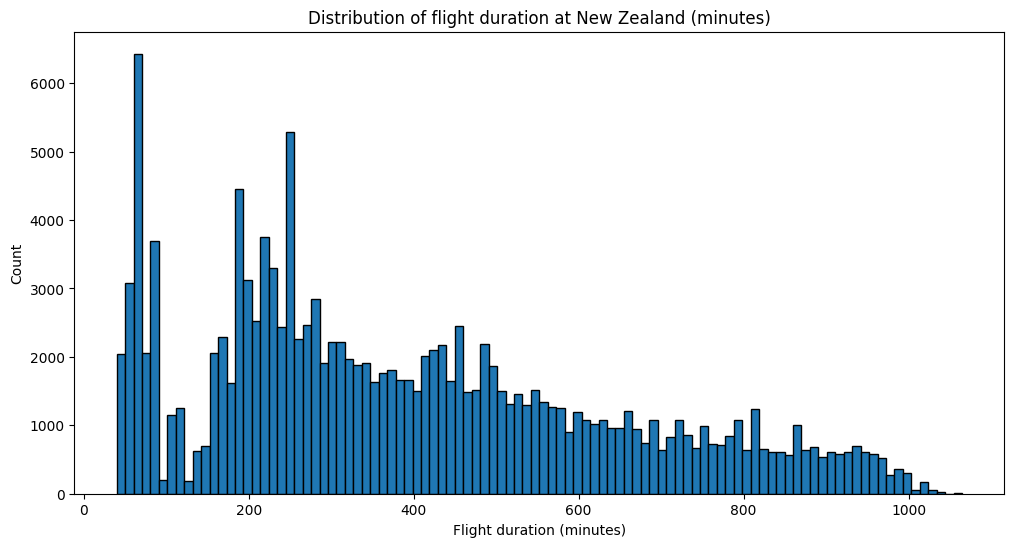

In [70]:
plt.figure(figsize=(12,6))
plt.hist(new_zealand_airfares["flight_duration_in_minutes"],bins=100,edgecolor="k")
plt.xlabel("Flight duration (minutes)")
plt.ylabel("Count")
plt.title("Distribution of flight duration at New Zealand (minutes)");
plt.savefig("/kaggle/working/plots/distribution_of_flight_duration_at_New_Zealand_(minutes).png")

####**Insights**
- Most of the flights have a flight duration of nearly 100 minutes, which is more than 1 hour, and 200 minutes which is above 2 hours 30 minutes.

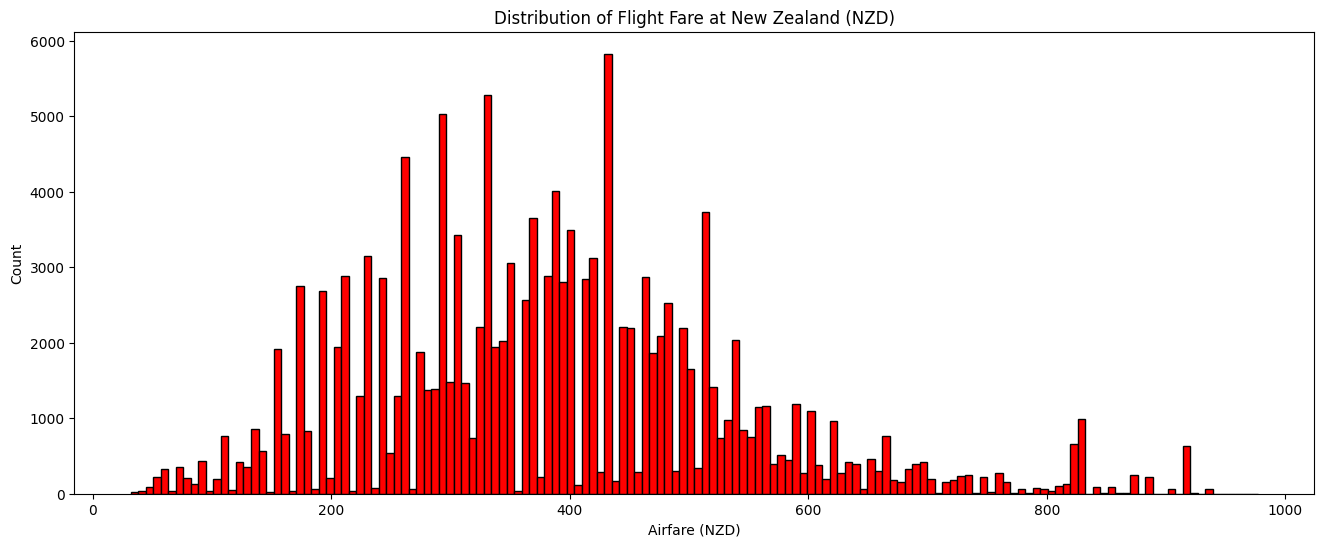

In [71]:
plt.figure(figsize=(16,6))
plt.hist(new_zealand_airfares["airfare_in_nzd"],color="red",bins=150,edgecolor="k");
plt.xlabel("Airfare (NZD)")
plt.ylabel("Count")
plt.title("Distribution of Flight Fare at New Zealand (NZD)");
plt.savefig("/kaggle/working/plots/distribution_of_flight_fare_at_new_zealand_in_nzd.png")

####**Insights:**
- The highest airfare is priced around 430 NZD.
- The price range of air travel in New Zealand is between 30 to 950 NZD.

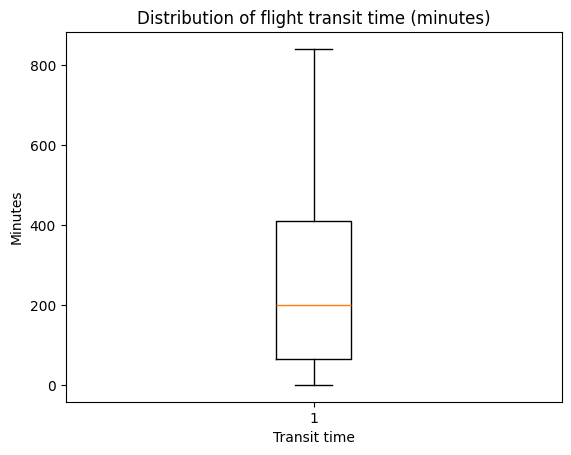

In [72]:
plt.boxplot(new_zealand_airfares["transit_time_in_minutes"])
plt.title("Distribution of flight transit time (minutes)")
plt.xlabel("Transit time")
plt.ylabel("Minutes")
plt.savefig("/kaggle/working/plots/distribution_of_flight_transit_time_minutes.png")

####**Insights:**
- The median is near to the lower quartile which denotes that most of the transit time is between 50 to 200 minutes.

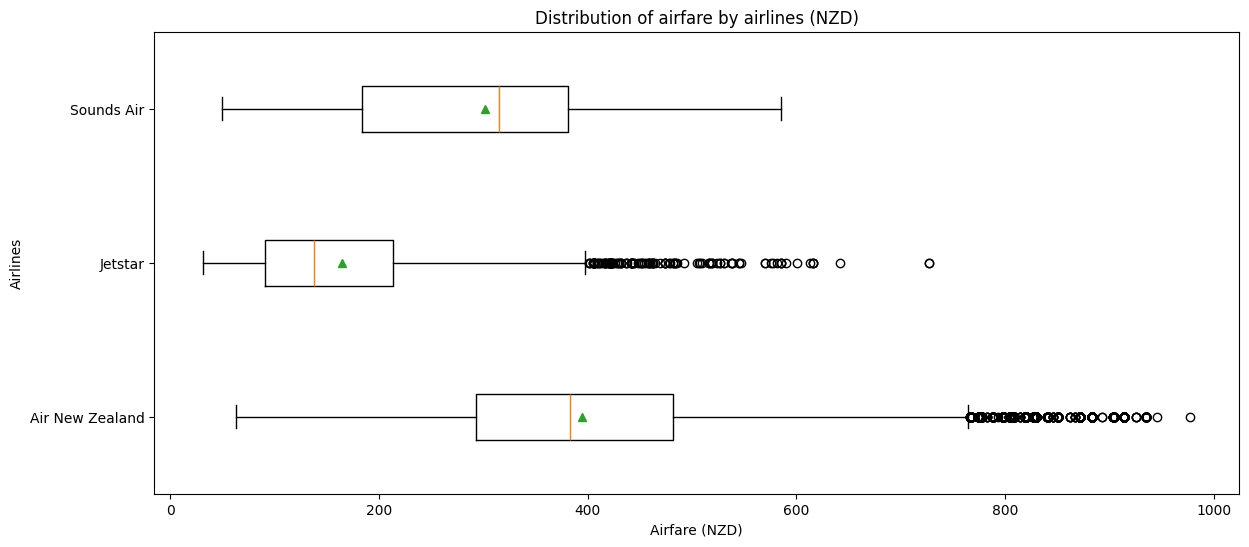

In [73]:
air_new_zealand_airline = new_zealand_airfares[new_zealand_airfares["airline"]=="Air New Zealand"]
jetstar_airline = new_zealand_airfares[new_zealand_airfares["airline"]=="Jetstar"]
sounds_air_airline = new_zealand_airfares[new_zealand_airfares["airline"]=="Sounds Air"]
f,ax = plt.subplots(figsize=(14,6))
ax.boxplot([air_new_zealand_airline["airfare_in_nzd"],jetstar_airline["airfare_in_nzd"],sounds_air_airline["airfare_in_nzd"]],vert=False,showmeans=True);
ax.set_xlabel("Airfare (NZD)")
ax.set_ylabel("Airlines")
ax.set_title("Distribution of airfare by airlines (NZD)")
ax.set_yticklabels(["Air New Zealand","Jetstar","Sounds Air"])
plt.savefig("/kaggle/working/plots/distribution_of_airfare_by_airlines_nzd.png")

###**Insights:**
- Jetstar has the lowest median comparing to Sounds Air and Air New Zealand, which denotes that Jetstar has lowest price tickets.
- The median of Air New Zealand is high denoting that the airfare of Air New Zealand is high.
- The spread of the box of Air New Zealand denotes that the most of the airfare ranges widely in Air New Zeaaland, whereas the spread of the box of Jetstar denotes that there is not much changes in the airfare of Jetstar.
- Air New Zealand has outliers which denotes that sometimes the airfare exceeds above 780 NZD till 1000 NZD.
- Jetstar has more outliers than Air New Zealand which denotes that sometimes the airfare of Jetstar lies between 400 NZD and 780 NZD.
- The mean lies after the median in Jetstar and Air New Zealand denoting that the higher airfare makes the average airfare to go up.
- The lower whisker of Jetstar is the lowest denoting that the minimum airfare is less than 50 NZD.

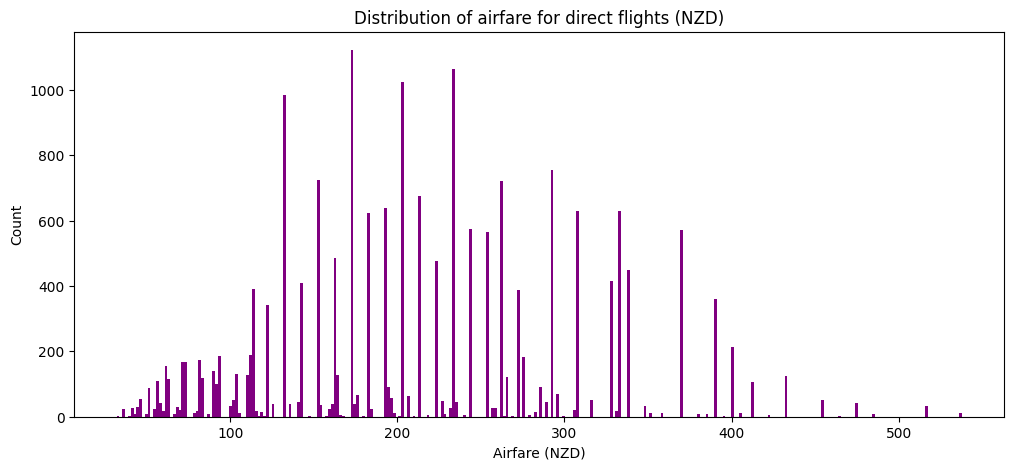

In [74]:
plt.figure(figsize=(12,5))
plt.hist(new_zealand_airfares[new_zealand_airfares["transit_time_in_minutes"]==0]["airfare_in_nzd"],bins=300,color="purple");
plt.xlabel("Airfare (NZD)")
plt.ylabel("Count")
plt.title("Distribution of airfare for direct flights (NZD)")
plt.savefig("/kaggle/working/plots/distribution_of_airfare_for_direct_flights_nzd.png")

####**Insights:**
- Most of the airfares for the direct flights in New Zealand is around 180 NZD.
- The airfare for direct flights ranges between 30 NZD to 560 NZD.

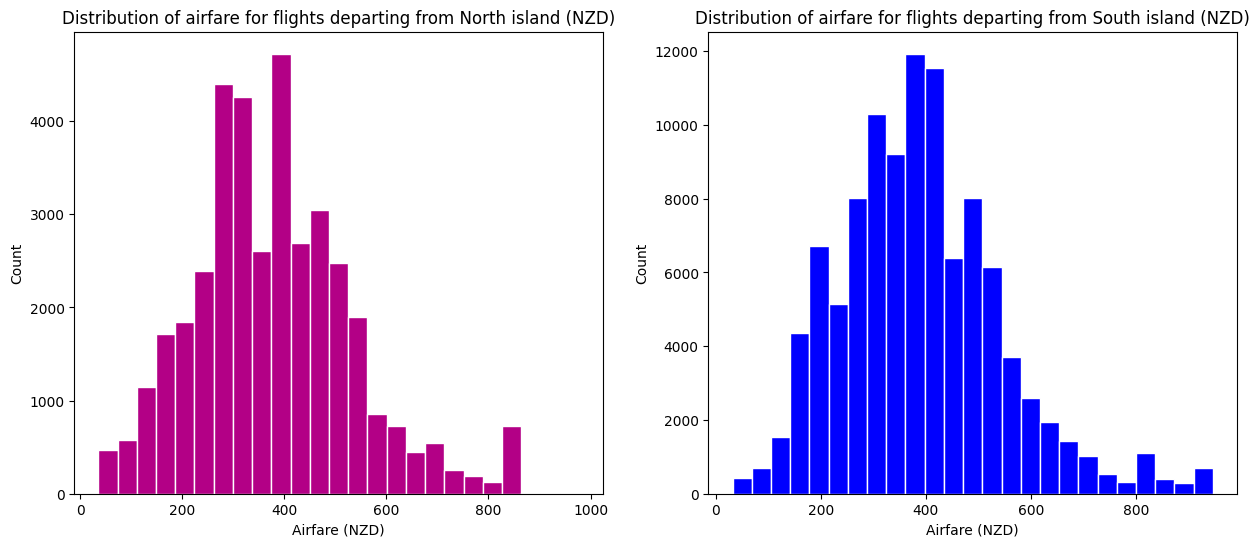

In [75]:
f,ax = plt.subplots(1,2,figsize=(15,6))
depart_from_north_island = new_zealand_airfares[new_zealand_airfares["departure_island"]=="North"]
ax[0].hist(depart_from_north_island["airfare_in_nzd"],color="#b30086",edgecolor="w",bins=25)
ax[0].set_xlabel("Airfare (NZD)")
ax[0].set_ylabel("Count")
ax[0].set_title("Distribution of airfare for flights departing from North island (NZD)")
depart_from_south_island = new_zealand_airfares[new_zealand_airfares["departure_island"]=="South"]
ax[1].hist(depart_from_south_island["airfare_in_nzd"],color="blue",edgecolor="w",bins=25)
ax[1].set_xlabel("Airfare (NZD)")
ax[1].set_ylabel("Count")
ax[1].set_title("Distribution of airfare for flights departing from South island (NZD)")
plt.savefig("/kaggle/working/plots/distribution_of_airfare_for_flights_departing_from_South_island_nzd.png")

####**Insights:**
- Most of the departing flights from both the North island and the South island have the price around 400 NZD.
- Very few flights departing from the North island and South island have price around 800 dollars.
- The costliest airfare for flights departing from the South island is above 900 NZD.

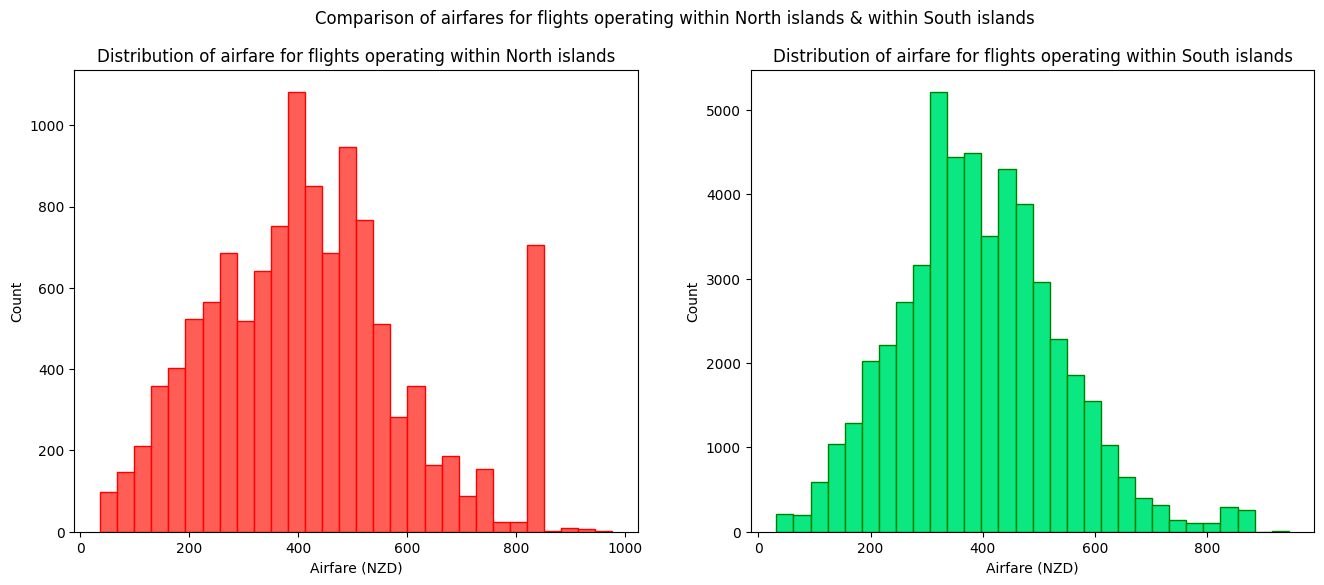

In [76]:
south_to_south_flights = new_zealand_airfares[(new_zealand_airfares["departure_island"]=="South")&(new_zealand_airfares["arrival_island"]=="South")]
north_to_north_flights = new_zealand_airfares[(new_zealand_airfares["departure_island"]=="North")&(new_zealand_airfares["arrival_island"]=="North")]
f,ax = plt.subplots(1,2,figsize=(16,6))
ax[0].hist(north_to_north_flights["airfare_in_nzd"],bins=30,color="#ff5e57",edgecolor="red")
ax[0].set_xlabel("Airfare (NZD)")
ax[0].set_ylabel("Count")
ax[0].set_title("Distribution of airfare for flights operating within North islands")
ax[1].hist(south_to_south_flights["airfare_in_nzd"],bins=30,color="#0be881",edgecolor="green")
ax[1].set_xlabel("Airfare (NZD)")
ax[1].set_ylabel("Count")
ax[1].set_title("Distribution of airfare for flights operating within South islands")
f.suptitle("Comparison of airfares for flights operating within North islands & within South islands")
plt.savefig("/kaggle/working/plots/comparison_of_airfares_for_flights_operating_within_north_island_and_within_south_island.png")

####**Insights:**
- Most of the airfare for flights operating within the North island are between 400 to 500 NZD, and around 810 NZD.
- Most of the airfare for flights operating within the South island are between 300 to 500 NZD.

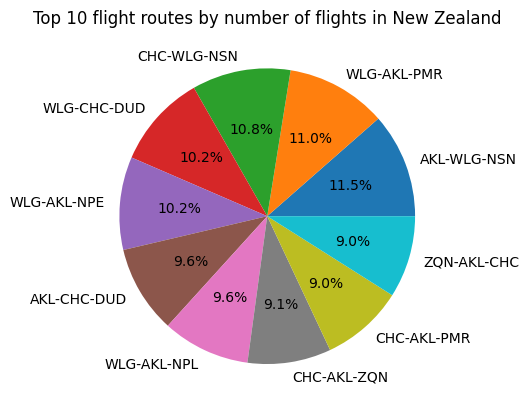

In [77]:
plt.pie(new_zealand_airfares["route"].value_counts().head(10).values,labels=new_zealand_airfares["route"].value_counts().head(10).index,autopct="%1.1f%%");
plt.title("Top 10 flight routes by number of flights in New Zealand");
plt.savefig("/kaggle/working/plots/top_10_flight_routes_by_number_of_flights_in_new_zealand.png")

####**Insights:**
- The flight route from Auckland(AKL) to Nelson airport(NSN) through a stop-over at Wellington(WLG) has the most number of flights in New Zealand.
- The second most operated flight route is from Wellington(WLG) to Palmerston aiport(PMR) through Auckland(AKL).
- The least operated flight route among the top 10 most operated flight routes is from Queenstown(ZQN) to Christchurch(CHC) through Auckland(AKL).

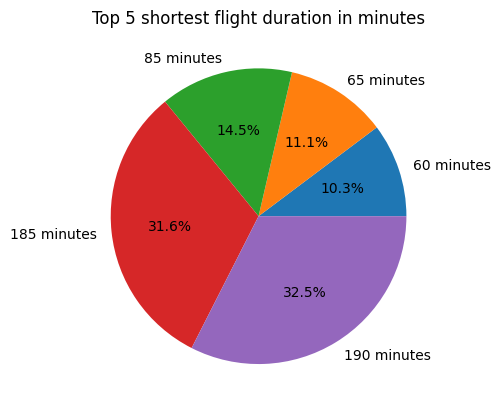

In [78]:
top_5_shortest_flight_duration = new_zealand_airfares.sort_values(by=["flight_duration_in_minutes"])["flight_duration_in_minutes"].value_counts().head().sort_index().index
plt.pie(top_5_shortest_flight_duration,labels=[str(duration)+" minutes" for duration in top_5_shortest_flight_duration],autopct="%1.1f%%");
plt.title("Top 5 shortest flight duration in minutes")
plt.savefig("/kaggle/working/plots/top_5_shortest_flight_duration_in_minutes.png")

####**Insights:**
- The shortest flight duration in New Zealand is 60 minutes.

###**Bivariate Analysis**

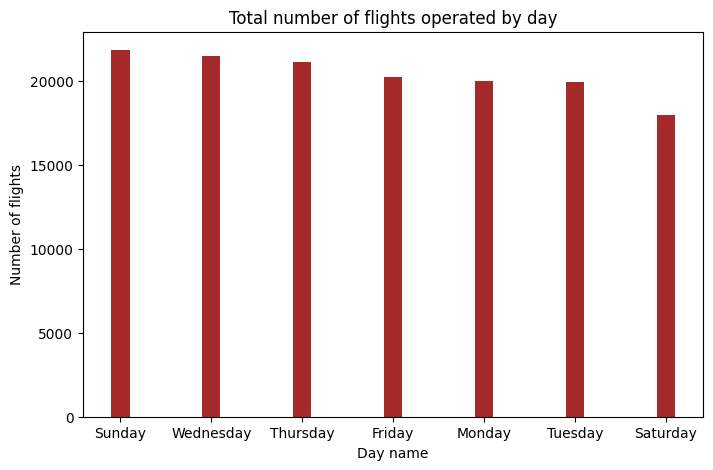

In [79]:
plt.figure(figsize=(8,5))
plt.bar(new_zealand_airfares["travel_day_name"].value_counts().index,new_zealand_airfares["travel_day_name"].value_counts().values,width=0.2,color="brown")
plt.xlabel("Day name")
plt.ylabel("Number of flights")
plt.title("Total number of flights operated by day")
plt.savefig("/kaggle/working/plots/total_number_of_flights_operated_by_day.png")

####**Insights:**
- Sunday and Wednesday has the most number of flights operated which is above 21000.
- Saturday has the least number of flights operated.

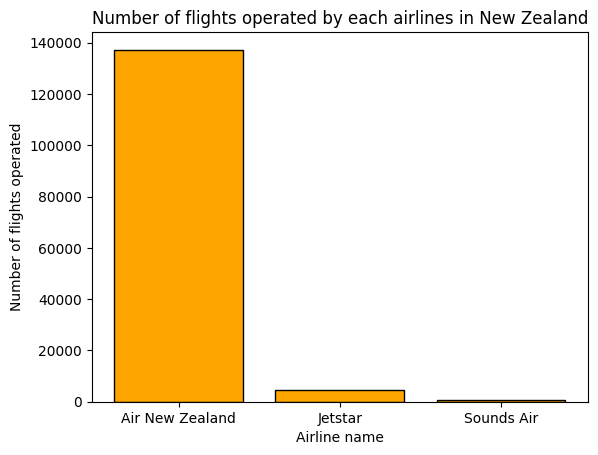

In [80]:
plt.bar(new_zealand_airfares["airline"].value_counts().index,new_zealand_airfares["airline"].value_counts().values,color="orange",edgecolor="k")
plt.xlabel("Airline name")
plt.ylabel("Number of flights operated")
plt.title("Number of flights operated by each airlines in New Zealand");
plt.savefig("/kaggle/working/plots/number_of_flights_operated_by_each_airlines_in_new_zealand.png")

####**Insights:**
- Air New Zealand has the maximum number of flights operated in New Zealand which is above 135000 flights.
- The total number of flights operated by Sounds Air is less than 2000 flights making it the least number of flights operated in New Zealand.

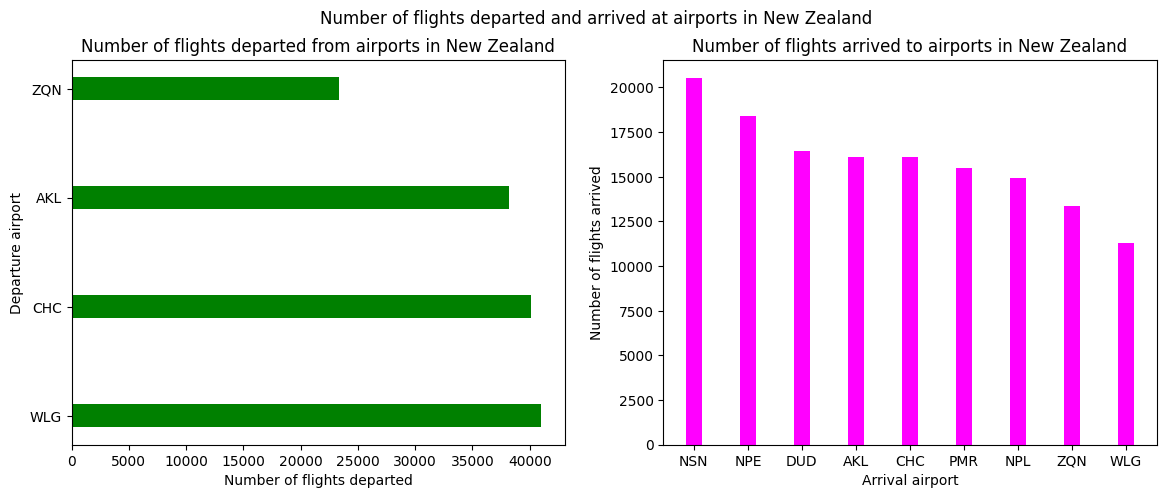

In [81]:
fig,ax = plt.subplots(1,2,figsize=(14,5))
ax[0].barh(new_zealand_airfares["departure_airport"].value_counts().index,new_zealand_airfares["departure_airport"].value_counts().values,height=0.21,color="green")
ax[0].set_title("Number of flights departed from airports in New Zealand")
ax[0].set_xlabel("Number of flights departed")
ax[0].set_ylabel("Departure airport")
ax[1].bar(new_zealand_airfares["arrival_airport"].value_counts().index,new_zealand_airfares["arrival_airport"].value_counts().values,width=0.3,color="magenta")
ax[1].set_title("Number of flights arrived to airports in New Zealand")
ax[1].set_ylabel("Number of flights arrived")
ax[1].set_xlabel("Arrival airport")
fig.suptitle("Number of flights departed and arrived at airports in New Zealand")
plt.savefig("/kaggle/working/plots/number_of_flights_departed_and_arrived_at_airports_in_new_zealand.png")

####**Insights:**
- Wellington (WLG), and Christchurch (CHC) tops the first two places in the maximum number of flight departures which is above 40000 flights.
- Queenstown airport (ZQN) had the least number of flights departed which is around 22000.
- The Nelson airport (NSN) had maximum number of flights arrived which is more than 20000 flights.
- Wellington had the least number of flights arrived which is around 11000.

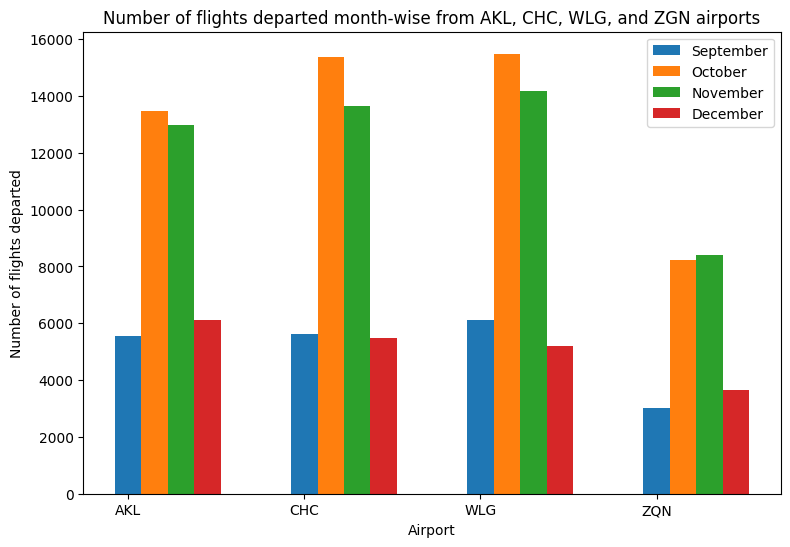

In [82]:
auckland_depart_flights = new_zealand_airfares[new_zealand_airfares["departure_airport"]=="AKL"]
christchurch_depart_flights = new_zealand_airfares[new_zealand_airfares["departure_airport"]=="CHC"]
wellington_depart_flights = new_zealand_airfares[new_zealand_airfares["departure_airport"]=="WLG"]
queenstown_depart_flights = new_zealand_airfares[new_zealand_airfares["departure_airport"]=="ZQN"]
september_total_departures = [auckland_depart_flights[auckland_depart_flights["departure_date_time"].dt.month==9].shape[0],christchurch_depart_flights[christchurch_depart_flights["departure_date_time"].dt.month==9].shape[0],wellington_depart_flights[wellington_depart_flights["departure_date_time"].dt.month==9].shape[0],queenstown_depart_flights[queenstown_depart_flights["departure_date_time"].dt.month==9].shape[0]]
october_total_departures = [auckland_depart_flights[auckland_depart_flights["departure_date_time"].dt.month==10].shape[0],christchurch_depart_flights[christchurch_depart_flights["departure_date_time"].dt.month==10].shape[0],wellington_depart_flights[wellington_depart_flights["departure_date_time"].dt.month==10].shape[0],queenstown_depart_flights[queenstown_depart_flights["departure_date_time"].dt.month==10].shape[0]]
november_total_departures = [auckland_depart_flights[auckland_depart_flights["departure_date_time"].dt.month==11].shape[0],christchurch_depart_flights[christchurch_depart_flights["departure_date_time"].dt.month==11].shape[0],wellington_depart_flights[wellington_depart_flights["departure_date_time"].dt.month==11].shape[0],queenstown_depart_flights[queenstown_depart_flights["departure_date_time"].dt.month==11].shape[0]]
december_total_departures = [auckland_depart_flights[auckland_depart_flights["departure_date_time"].dt.month==12].shape[0],christchurch_depart_flights[christchurch_depart_flights["departure_date_time"].dt.month==12].shape[0],wellington_depart_flights[wellington_depart_flights["departure_date_time"].dt.month==12].shape[0],queenstown_depart_flights[queenstown_depart_flights["departure_date_time"].dt.month==12].shape[0]]
bar_width = 0.15
x_coords_september = np.arange(1,5)
x_coords_october = [num+bar_width for num in x_coords_september]
x_coords_november = [num+bar_width for num in x_coords_october]
x_coords_december = [num+bar_width for num in x_coords_november]
plt.figure(figsize=(9,6))
plt.bar(x_coords_september,september_total_departures,width=bar_width,label="September")
plt.bar(x_coords_october,october_total_departures,width=bar_width,label="October")
plt.bar(x_coords_november,november_total_departures,width=bar_width,label="November")
plt.bar(x_coords_december,december_total_departures,width=bar_width,label="December")
plt.xticks(x_coords_september,["AKL","CHC","WLG","ZQN"]);
plt.title("Number of flights departed month-wise from AKL, CHC, WLG, and ZGN airports")
plt.xlabel("Airport")
plt.ylabel("Number of flights departed")
plt.legend()
plt.savefig("/kaggle/working/plots/number_of_flights_departed_month_wise_from_akl_chc_wlg_zgn_airports.png")

####**Insights:**
- AKL, CHC, and WLG are the top 3 airports with highest number of flights departing in the month of October.
- The month of November holds the second place for the maximum number of flights depated from AKL, CHC, and WLG airports which is between 13000 to 14000.
- In Queenstown airport, the number of flights departed in the month of November is higher than October.
- September had the least number of flight departures from AKL, CHC, WLG, and ZQN airports which is less than 6000 flights.

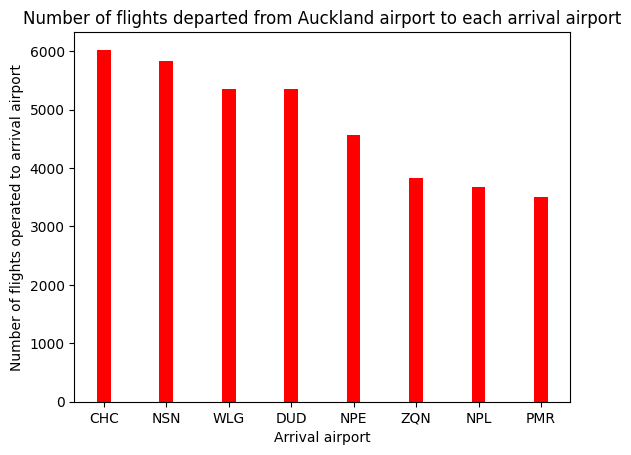

In [83]:
plt.bar(auckland_depart_flights["arrival_airport"].value_counts().index,auckland_depart_flights["arrival_airport"].value_counts().values,color="red",width=0.22)
plt.xlabel("Arrival airport")
plt.ylabel("Number of flights operated to arrival airport")
plt.title("Number of flights departed from Auckland airport to each arrival airport")
plt.savefig("/kaggle/working/plots/number_of_flights_departed_from_auckland_airport_to_each_arrival_airport.png")

####**Insights:**
- Christchurch airport (CHC) had the highest number of arrivals from Auckland airport (AKL) which is nearly 6000.
- The Palmerston airport (PMR) had less number of flights coming from Auckland airport (AKL) which is around 3500.

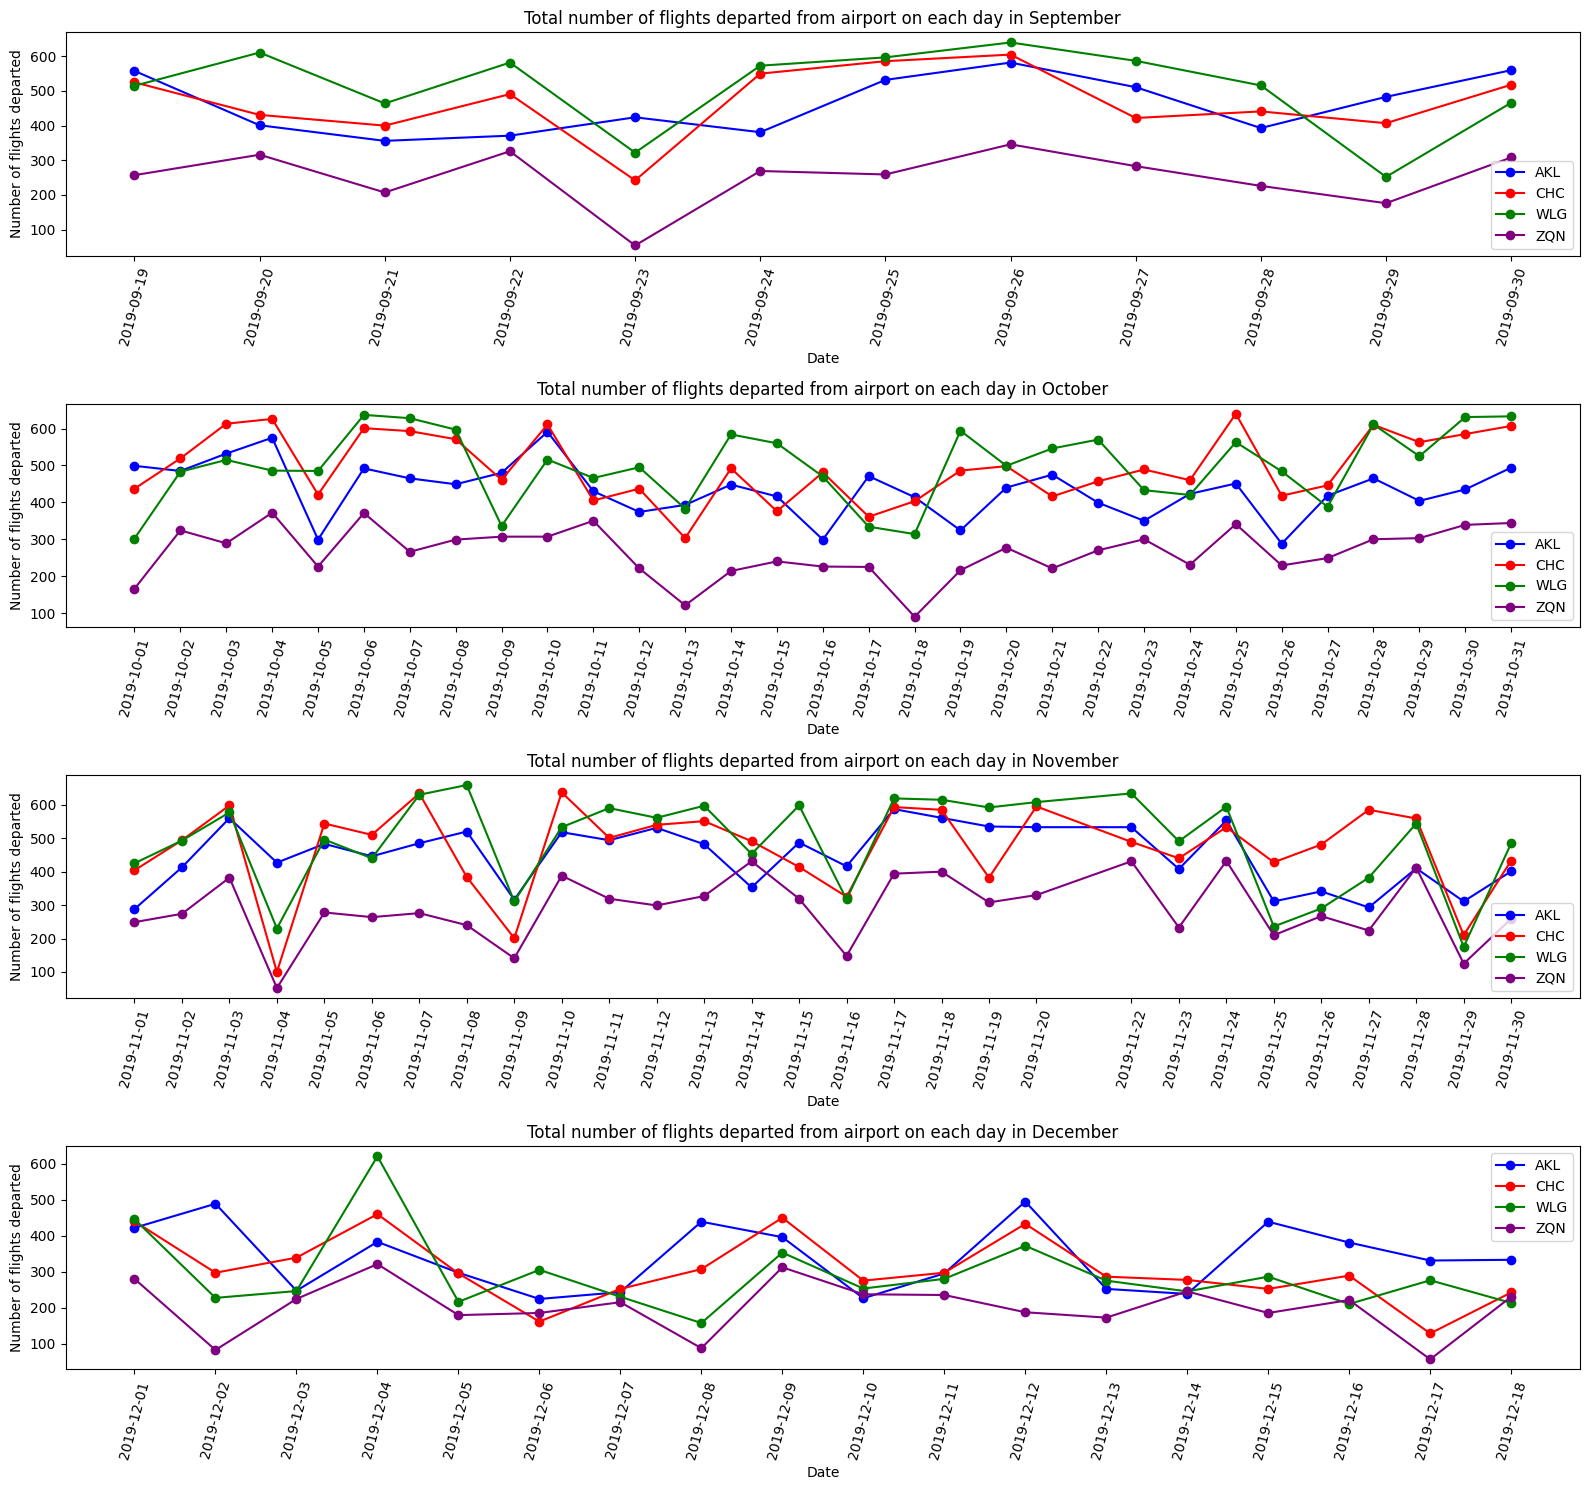

In [84]:
f,ax = plt.subplots(4,1,figsize=(16,15))
months = ["September","October","November","December"]
for ax_num in range(4):
  ax[ax_num].plot(auckland_depart_flights[auckland_depart_flights["travel_date"].dt.month==(9+ax_num)]["travel_date"].value_counts().sort_index().index,auckland_depart_flights[auckland_depart_flights["travel_date"].dt.month==(9+ax_num)]["travel_date"].value_counts().sort_index().values,color="blue",marker="o",label="AKL")
  ax[ax_num].plot(christchurch_depart_flights[christchurch_depart_flights["travel_date"].dt.month==(9+ax_num)]["travel_date"].value_counts().sort_index().index,christchurch_depart_flights[christchurch_depart_flights["travel_date"].dt.month==(9+ax_num)]["travel_date"].value_counts().sort_index().values,color="red",marker="o",label="CHC")
  ax[ax_num].plot(wellington_depart_flights[wellington_depart_flights["travel_date"].dt.month==(9+ax_num)]["travel_date"].value_counts().sort_index().index,wellington_depart_flights[wellington_depart_flights["travel_date"].dt.month==(9+ax_num)]["travel_date"].value_counts().sort_index().values,color="green",marker="o",label="WLG")
  ax[ax_num].plot(queenstown_depart_flights[queenstown_depart_flights["travel_date"].dt.month==(9+ax_num)]["travel_date"].value_counts().sort_index().index,queenstown_depart_flights[queenstown_depart_flights["travel_date"].dt.month==(9+ax_num)]["travel_date"].value_counts().sort_index().values,color="purple",marker="o",label="ZQN")
  ax[ax_num].set_xticks(auckland_depart_flights[auckland_depart_flights["travel_date"].dt.month==(9+ax_num)]["travel_date"].value_counts().sort_index().index)
  ax[ax_num].tick_params(axis="x",labelrotation=75)
  ax[ax_num].legend()
  ax[ax_num].set_xlabel("Date")
  ax[ax_num].set_ylabel("Number of flights departed")
  ax[ax_num].set_title(f"Total number of flights departed from airport on each day in {months[ax_num]}")
f.tight_layout()
plt.savefig("/kaggle/working/plots/total_number_of_flights_departed_from_airport_day_wise_for_months.png")

####**Insights:**
- 26th September 2019 has the highest number of flights departed from Wellington airport in September which is around 650.
- There is a sudden decline in the number of flights departing from Queenstown (ZQN) airport on 23rd September 2019.
- Christchurch and Wellington had almost the same number of flight departures on 25th of October 2019.
- 3rd of November 2019 had more than 300 flight departures from AKL, CHC, WLG, and ZQN, which suddenly dropped the next day to less than 100 flights from CHC and ZQN airports.
- Wellington airport had highest number of flight departures on 8th and 22nd of November 2019.
- Auckland had highest number of flights departing on 2nd and 12th of December 2019.
- Queenstown (ZQN) airport had a deep decline in number of flights departing on 2nd and 17th of December 2019.

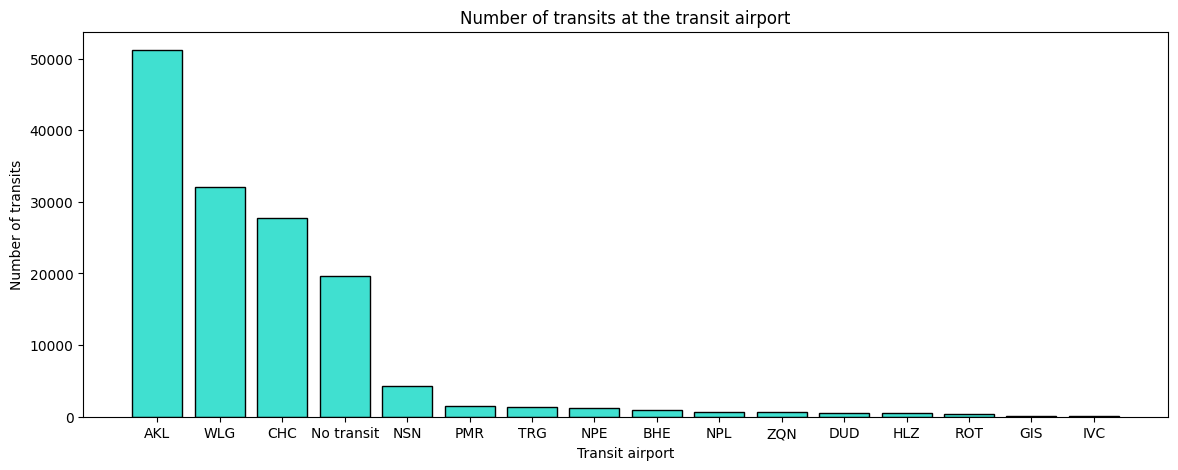

In [85]:
f,ax = plt.subplots(figsize=(14,5))
ax.bar(new_zealand_airfares["transit_airport"].value_counts().index,new_zealand_airfares["transit_airport"].value_counts().values,color="turquoise",edgecolor="k")
ax.set_xlabel("Transit airport")
ax.set_ylabel("Number of transits")
ax.set_title("Number of transits at the transit airport")
plt.savefig("/kaggle/working/plots/number_of_transits_at_the_transit_airport.png")

####**Insights:**
- Auckland airport (AKL) has the highest number of transits.
- IVC airport had the least number of transits.

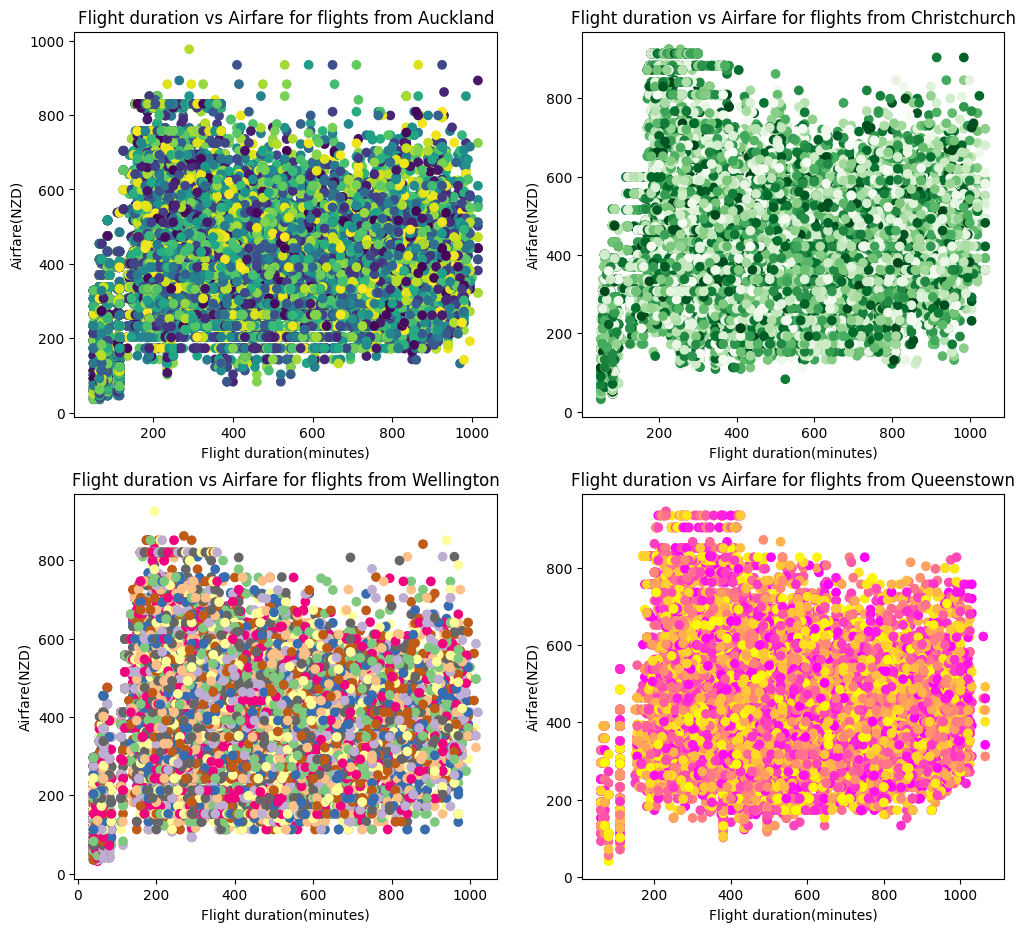

In [86]:
f,ax = plt.subplots(2,2,figsize=(12,11))
ax[0,0].scatter(auckland_depart_flights["flight_duration_in_minutes"],auckland_depart_flights["airfare_in_nzd"],cmap="viridis",c=np.random.randint(1,100,size=(len(auckland_depart_flights))))
ax[0,0].set_xlabel("Flight duration(minutes)")
ax[0,0].set_ylabel("Airfare(NZD)")
ax[0,0].set_title("Flight duration vs Airfare for flights from Auckland")
ax[0,1].scatter(christchurch_depart_flights["flight_duration_in_minutes"],christchurch_depart_flights["airfare_in_nzd"],cmap="Greens",c=np.random.randint(1,100,size=(len(christchurch_depart_flights))))
ax[0,1].set_xlabel("Flight duration(minutes)")
ax[0,1].set_ylabel("Airfare(NZD)")
ax[0,1].set_title("Flight duration vs Airfare for flights from Christchurch")
ax[1,0].scatter(wellington_depart_flights["flight_duration_in_minutes"],wellington_depart_flights["airfare_in_nzd"],cmap="Accent",c=np.random.randint(1,100,size=(len(wellington_depart_flights))))
ax[1,0].set_xlabel("Flight duration(minutes)")
ax[1,0].set_ylabel("Airfare(NZD)")
ax[1,0].set_title("Flight duration vs Airfare for flights from Wellington");
ax[1,1].scatter(queenstown_depart_flights["flight_duration_in_minutes"],queenstown_depart_flights["airfare_in_nzd"],cmap="spring",c=np.random.randint(1,100,size=(len(queenstown_depart_flights))))
ax[1,1].set_xlabel("Flight duration(minutes)")
ax[1,1].set_ylabel("Airfare(NZD)")
ax[1,1].set_title("Flight duration vs Airfare for flights from Queenstown");
fig.tight_layout()
plt.savefig("/kaggle/working/plots/flight_duration_vs_airfare_for_flights_by_airport.png")

####**Insights:**
- The airfare for the flights which had a duration of 1 hour 30 minutes had the least price of less than 100 NZD in AKL, CHC, WLG, ZQN airports.
- The airfare is high as above 800 NZD when the flight duration is between 200 to 300 minutes.

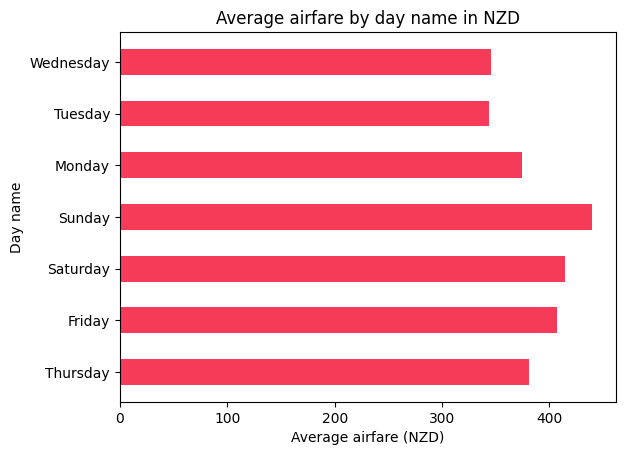

In [87]:
travel_day_names = new_zealand_airfares["travel_day_name"].unique()
plt.barh(travel_day_names,[new_zealand_airfares[new_zealand_airfares["travel_day_name"]==travel_day_names[day_name_index]]["airfare_in_nzd"].mean() for day_name_index in range(0,7)],height=0.5,color="#f53b57")
plt.title("Average airfare by day name in NZD")
plt.xlabel("Average airfare (NZD)")
plt.ylabel("Day name")
plt.savefig("/kaggle/working/plots/average_airfare_by_day_name_in_nzd.png")

####**Insights:**
- The average airfare is high on Sunday for nearly 450 NZD.
- The average airfare is less on Monday and Tuesday for nearly 330 NZD.

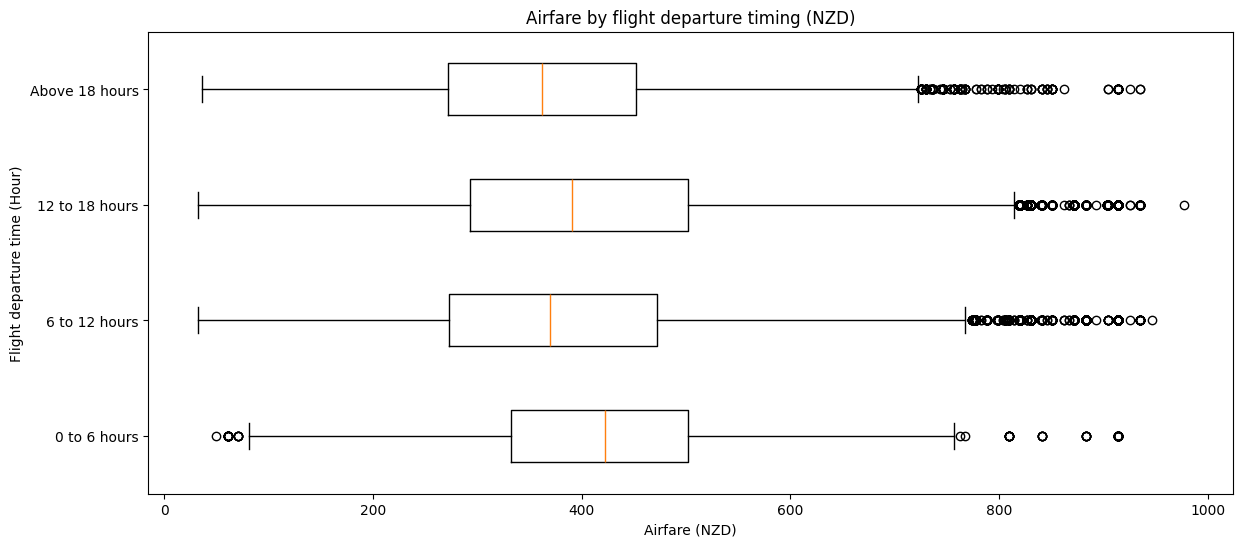

In [88]:
f,ax=plt.subplots(figsize=(14,6))
ax.boxplot([new_zealand_airfares[(new_zealand_airfares["departure_date_time"].dt.hour>=0)&(new_zealand_airfares["departure_date_time"].dt.hour<6)]["airfare_in_nzd"],new_zealand_airfares[(new_zealand_airfares["departure_date_time"].dt.hour>=6)&(new_zealand_airfares["departure_date_time"].dt.hour<12)]["airfare_in_nzd"],new_zealand_airfares[(new_zealand_airfares["departure_date_time"].dt.hour>=12)&(new_zealand_airfares["departure_date_time"].dt.hour<18)]["airfare_in_nzd"],new_zealand_airfares[new_zealand_airfares["departure_date_time"].dt.hour>=18]["airfare_in_nzd"]],vert=False)
ax.set_title("Airfare by flight departure timing (NZD)")
ax.set_xlabel("Airfare (NZD)")
ax.set_ylabel("Flight departure time (Hour)")
ax.set_yticklabels(["0 to 6 hours","6 to 12 hours","12 to 18 hours","Above 18 hours"])
plt.savefig("/kaggle/working/plots/airfare_by_flight_departure_timing_nzd.png")

####**Insights:**
- Most of the lowest airfare flights have the departure time between 6 to 12 hours with a price ranging between 270  to 380 NZD.
- Most of the highest airfare flights are between 12 to 18 hours with a price range between 300 to 500 NZD.
- The early morning flights departing between 0 to 6 hours sometimes has cheap ticket rate around 50 to 100 NZD.
- The early morning flights departing between 0 to 6 hours sometimes has premium airfare ranging between 770 NZD to 930 NZD, which are denoted by the outliers.
- An outlier in the flights departing between 12 to 18 hours denote that a premium price of nearly 1000 NZD is present on somedays.
- Most of the flights departing from 18 to night 12 has the airfare between 270 to 450 NZD, except the occassional premium airfare which costs more than 750 NZD to 970 NZD.

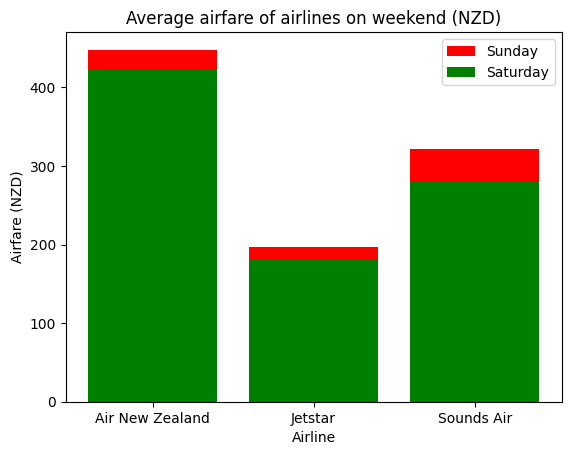

In [89]:
airlines_new_zealand_saturday = new_zealand_airfares[new_zealand_airfares["travel_day_name"]=="Saturday"].groupby("airline")
saturday_airfare = airlines_new_zealand_saturday["airfare_in_nzd"].mean()
airlines_new_zealand_sunday = new_zealand_airfares[new_zealand_airfares["travel_day_name"]=="Sunday"].groupby("airline")
sunday_airfare = airlines_new_zealand_sunday["airfare_in_nzd"].mean()
plt.bar(sunday_airfare.index,sunday_airfare.values,color="red",label="Sunday")
plt.bar(saturday_airfare.index,saturday_airfare.values,color="green",label="Saturday")
plt.legend()
plt.xlabel("Airline")
plt.ylabel("Airfare (NZD)")
plt.title("Average airfare of airlines on weekend (NZD)")
plt.savefig("/kaggle/working/plots/average_airfare_of_airlines_on_weekend_nzd.png")

####**Insights:**
- The average airfare of all airlines are higher on Sunday than on Saturday.
- The average airfare of Air New Zealand is higher than Sounds Air, and Jetstar.

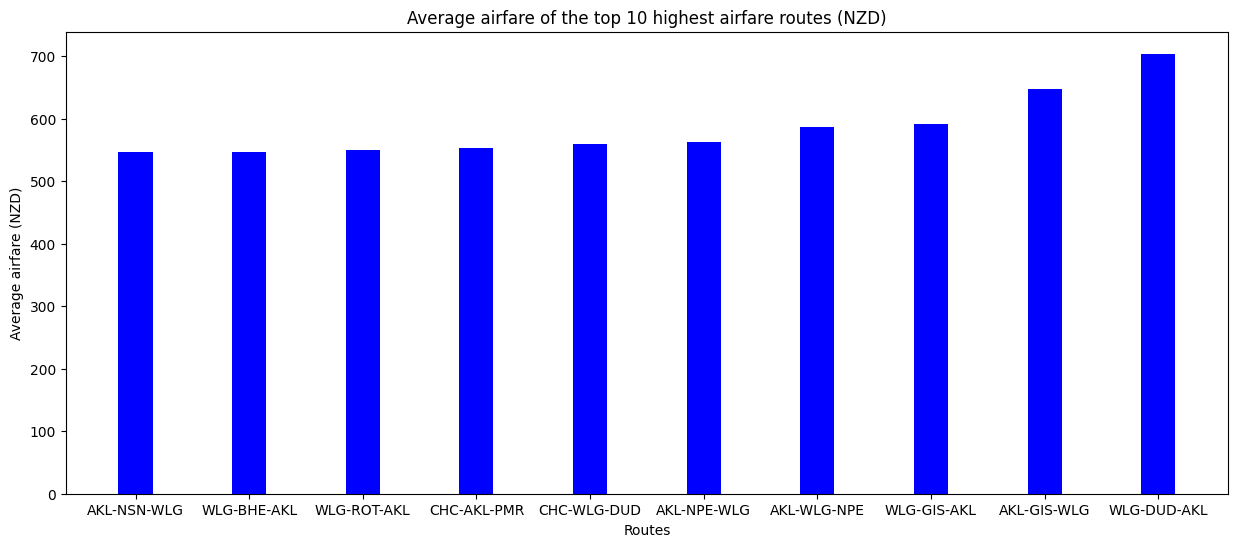

In [90]:
mean_of_routes_by_airfare = new_zealand_airfares.groupby("route")["airfare_in_nzd"].mean()
top_10_routes_by_airfare_mean = mean_of_routes_by_airfare.sort_values().tail(10)
plt.figure(figsize=(15,6))
plt.bar(top_10_routes_by_airfare_mean.index,top_10_routes_by_airfare_mean.values,width=0.3,color="blue")
plt.xlabel("Routes")
plt.ylabel("Average airfare (NZD)")
plt.title("Average airfare of the top 10 highest airfare routes (NZD)")
plt.savefig("/kaggle/working/plots/average_airfare_of_the_top_10_highest_airfare_routes_nzd.png")

####**Insights:**
- The route WLG-DUD-AKL is the route with the highest airfare, whose average airfare is 700 NZD.
- The top 10 routes having highest airfares are not direct flights, and they have 1 stop-over.

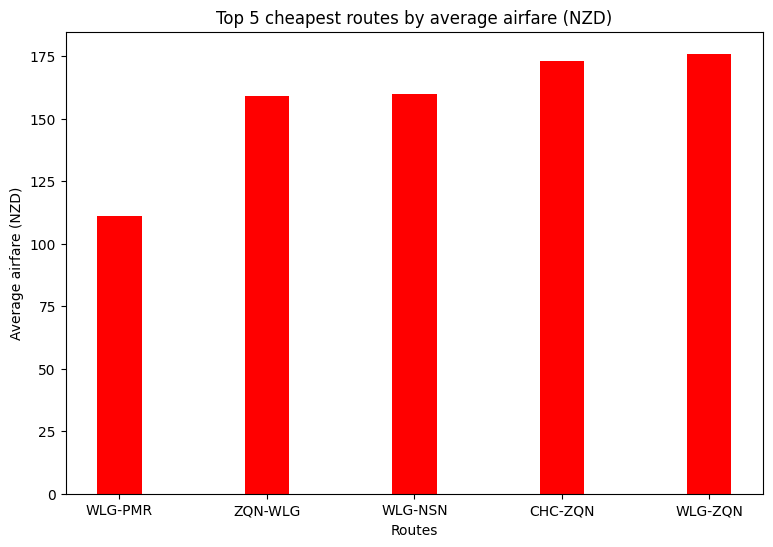

In [91]:
top_5_cheapest_routes_by_airfare_mean = mean_of_routes_by_airfare.sort_values().head(5)
plt.figure(figsize=(9,6))
plt.bar(top_5_cheapest_routes_by_airfare_mean.index,top_5_cheapest_routes_by_airfare_mean.values,width=0.3,color="red")
plt.xlabel("Routes")
plt.ylabel("Average airfare (NZD)")
plt.title("Top 5 cheapest routes by average airfare (NZD)")
plt.savefig("/kaggle/working/plots/top_5_cheapest_routes_by_average_airfare_nzd.png")

####**Insights:**
- The route from Wellington airport (WLG) to Palmerston airport (PMR) is the cheapest among all the air routes, whose average airfare is around 115 NZD.
- The top 5 cheapest routes are direct flights with no stop-over.

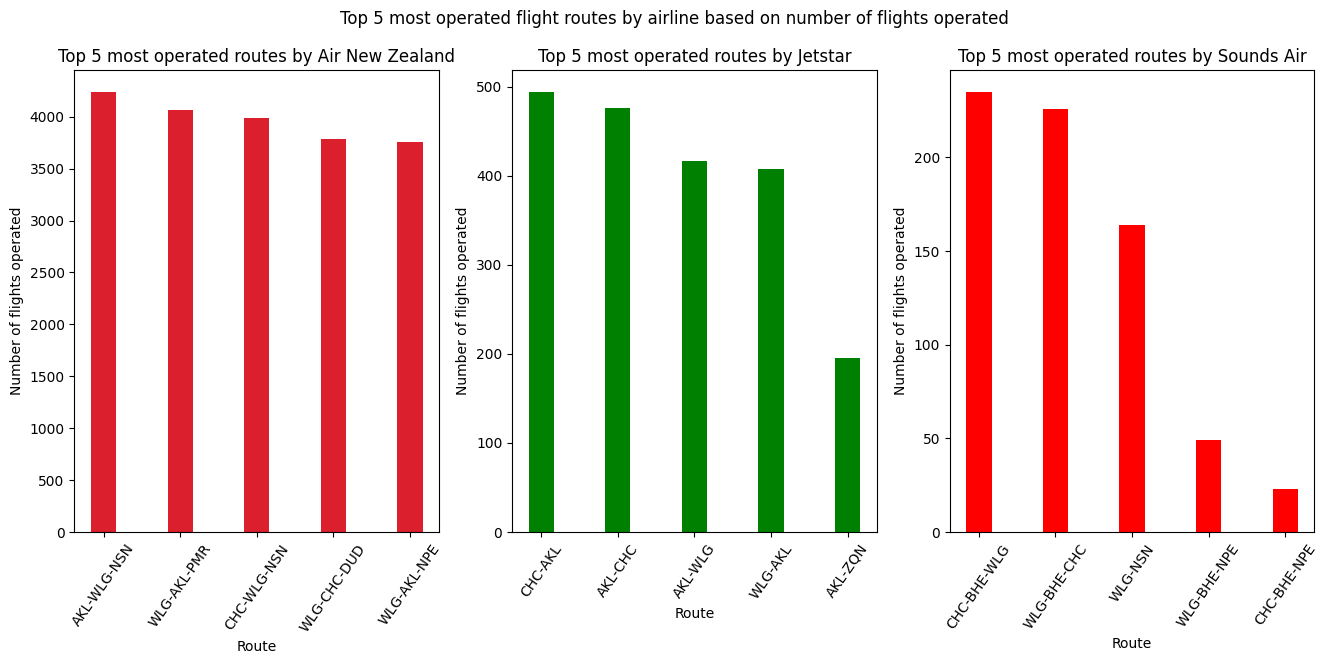

In [92]:
routes_by_air_new_zealand = new_zealand_airfares.groupby("airline")["route"].value_counts().loc["Air New Zealand"]
routes_by_jetstar = new_zealand_airfares.groupby("airline")["route"].value_counts().loc["Jetstar"]
routes_by_sounds_air = new_zealand_airfares.groupby("airline")["route"].value_counts().loc["Sounds Air"]
f,ax = plt.subplots(1,3,figsize=(16,6))
ax[0].bar(routes_by_air_new_zealand.head().index,routes_by_air_new_zealand.head().values,color="#DB1F2C",width=0.33)
ax[0].set_xticks(routes_by_air_new_zealand.head().index)
ax[0].set_xticklabels(labels=routes_by_air_new_zealand.head().index,rotation=55)
ax[0].set_xlabel("Route")
ax[0].set_ylabel("Number of flights operated")
ax[0].set_title("Top 5 most operated routes by Air New Zealand")
ax[1].bar(routes_by_jetstar.head().index,routes_by_jetstar.head().values,color="green",width=0.33)
ax[1].set_xticks(routes_by_jetstar.head().index)
ax[1].set_xticklabels(labels=routes_by_jetstar.head().index,rotation=55)
ax[1].set_xlabel("Route")
ax[1].set_ylabel("Number of flights operated")
ax[1].set_title("Top 5 most operated routes by Jetstar")
ax[2].bar(routes_by_sounds_air.head().index,routes_by_sounds_air.head().values,color="red",width=0.33)
ax[2].set_xticks(routes_by_sounds_air.head().index)
ax[2].set_xticklabels(labels=routes_by_sounds_air.head().index,rotation=55)
ax[2].set_xlabel("Route")
ax[2].set_ylabel("Number of flights operated")
ax[2].set_title("Top 5 most operated routes by Sounds Air")
f.suptitle("Top 5 most operated flight routes by airline based on number of flights operated")
plt.savefig("/kaggle/working/plots/top_5_most_operated_flight_routes_by_airline_based_on_number_of_flights_operated.png")

####**Insights:**
- The top 5 most operated routes by Jetstar are direct flights.
- The top 5 most operated routes by Air New Zealand are not direct flights.
- Sounds Air has one direct flight route from Wellington (WLG) to Nelson airport (NSN) among the top 5 most operated routes, while the other four routes have 1 stopover.

In [93]:
new_zealand_airfares.to_csv("cleaned_dataset_new_zealand_airfares.csv")